## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [2]:
df = pd.read_csv(r"C:\Users\sonim\OneDrive\Desktop\Credit Card Fraud\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All features are float type except the class - column

#### Here we will observe the distribution of our classes

In [4]:
classes=df['Class'].value_counts()
normal_share=(classes[0]/df['Class'].count()*100).round(2)
fraud_share=(classes[1]/df['Class'].count()*100).round(2)

In [5]:
print('There are 2 classes which are distributed by',classes.values,'-values','among whom normal shares are',normal_share,'and fraud shares are',fraud_share)


There are 2 classes which are distributed by [284315    492] -values among whom normal shares are 99.83 and fraud shares are 0.17


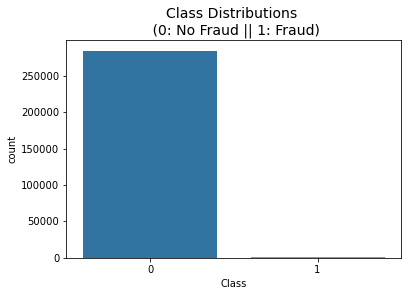

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcation

sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

plt.show()

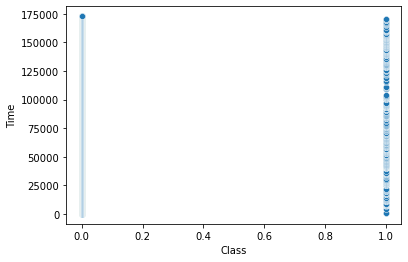

In [7]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df['Class'],df['Time'])

plt.show()

It shows the the anomaly of Fradulent Class

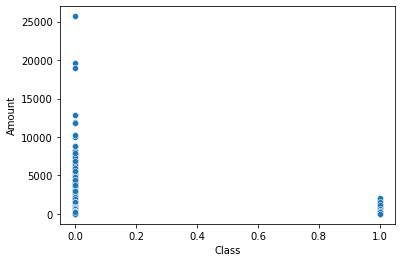

In [8]:
# Create a scatter plot to observe the distribution of classes with Amount

sns.scatterplot(df['Class'],df['Amount'])
plt.show()

This could be useful column  as it shows that at which is the suspected amount for fraud

In [9]:
# Drop unnecessary columns

df.drop('Time',axis=1, inplace=True)

### Splitting the data into train & test data

In [10]:
y= df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [11]:
X=df.drop('Class',axis=1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [12]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100,stratify=y)

In [13]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
222925,2.053474,-0.149880,-1.092234,0.420978,-0.225796,-1.159629,0.082871,-0.236532,0.733270,0.102520,...,-0.313465,-0.298362,-0.779702,0.362701,-0.048183,-0.356438,0.205392,-0.075806,-0.063325,1.29
163811,0.149477,1.112008,-0.391539,-0.557452,1.014727,-0.801985,1.042734,-0.167625,-0.200830,-0.863839,...,0.084311,-0.331768,-0.755443,0.079155,0.587098,-0.383245,0.110292,0.229167,0.086294,2.69
196038,2.145379,0.215237,-2.221643,-0.067032,0.815822,-1.358596,0.843943,-0.594243,0.009745,-0.021497,...,-0.133286,0.153606,0.611995,-0.027494,0.824538,0.505014,0.203037,-0.083225,-0.069468,4.55
25173,-0.354219,0.100332,1.721509,-0.884417,-0.371977,-0.062313,-0.144740,0.163123,-1.843755,0.520706,...,0.295444,0.136969,0.217167,-0.014350,0.016538,-0.326120,-0.285113,0.118226,0.103791,19.95
253792,-0.439888,1.871311,-1.106687,1.064853,1.239594,-0.633668,1.100319,0.221096,-0.917002,-0.844362,...,0.024939,0.059066,0.366613,-0.250861,0.494710,0.091257,-0.398552,0.330173,0.219909,6.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194533,-0.917471,0.855403,1.516046,-0.220692,0.747332,0.859372,0.827820,0.281375,0.400861,-1.066695,...,-0.274203,-0.583911,-1.674141,-0.248766,-0.213942,0.609341,-1.054254,-0.068467,0.048981,34.48
163532,-0.818922,-0.653837,1.685615,-1.561367,0.357487,1.306132,0.371795,-0.086070,-0.349493,0.156626,...,0.072708,0.248178,1.356247,-0.603728,-1.037884,0.609915,0.318683,-0.277412,-0.461930,100.79
47169,0.984295,-0.951871,0.760848,0.729305,-1.429835,-0.353366,-0.542588,-0.063028,-0.419503,0.629828,...,-0.233008,-0.148347,-0.163503,-0.190719,0.378213,0.456626,-0.239030,0.045741,0.061764,170.00
138367,0.699525,-1.558081,0.286748,0.349547,-1.519666,-0.535495,-0.117706,-0.177233,-0.468385,0.452339,...,0.116917,-0.456747,-1.458638,-0.134677,0.368357,0.086125,0.273679,-0.065344,0.075715,338.40


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [14]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

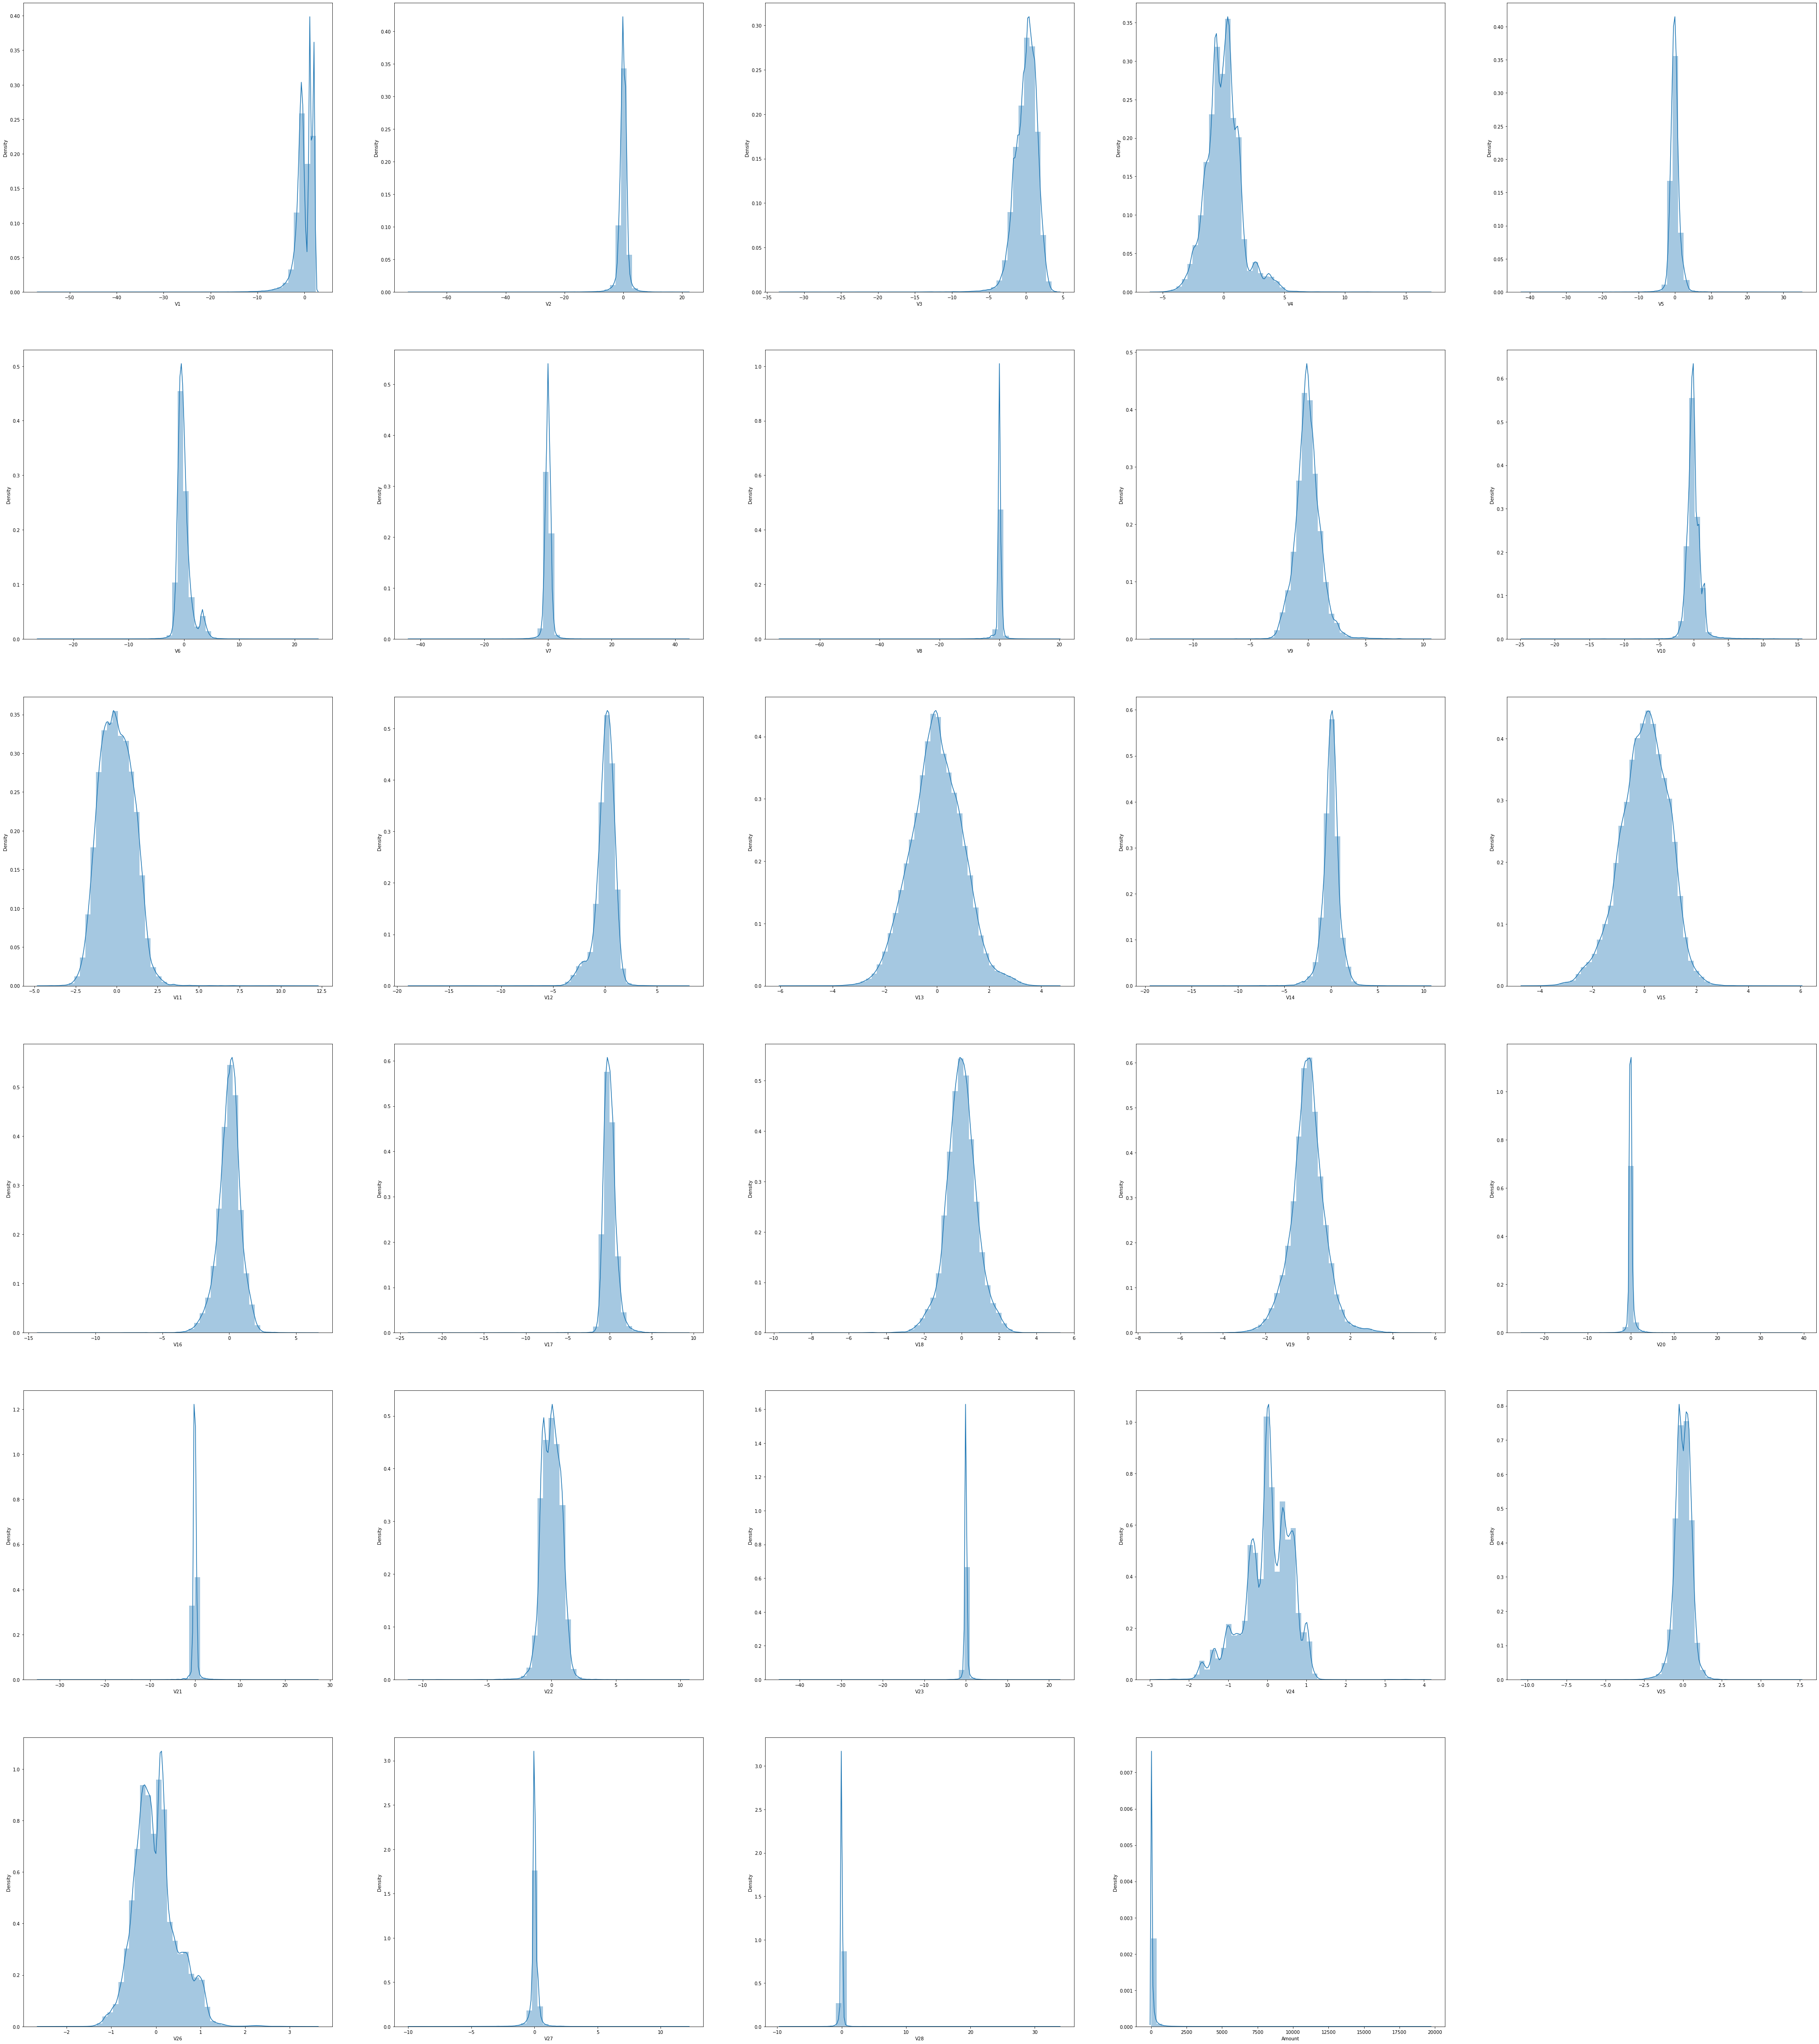

In [15]:
# plot the histogram of a variable from the dataset to see the skewness

plt.figure(figsize = (70,95))
for i in enumerate(X_train.describe().columns):
    plt.subplot(7,5,i[0]+1)
    sns.distplot(X_train[i[1]])
    plt.xlabel(i[1])

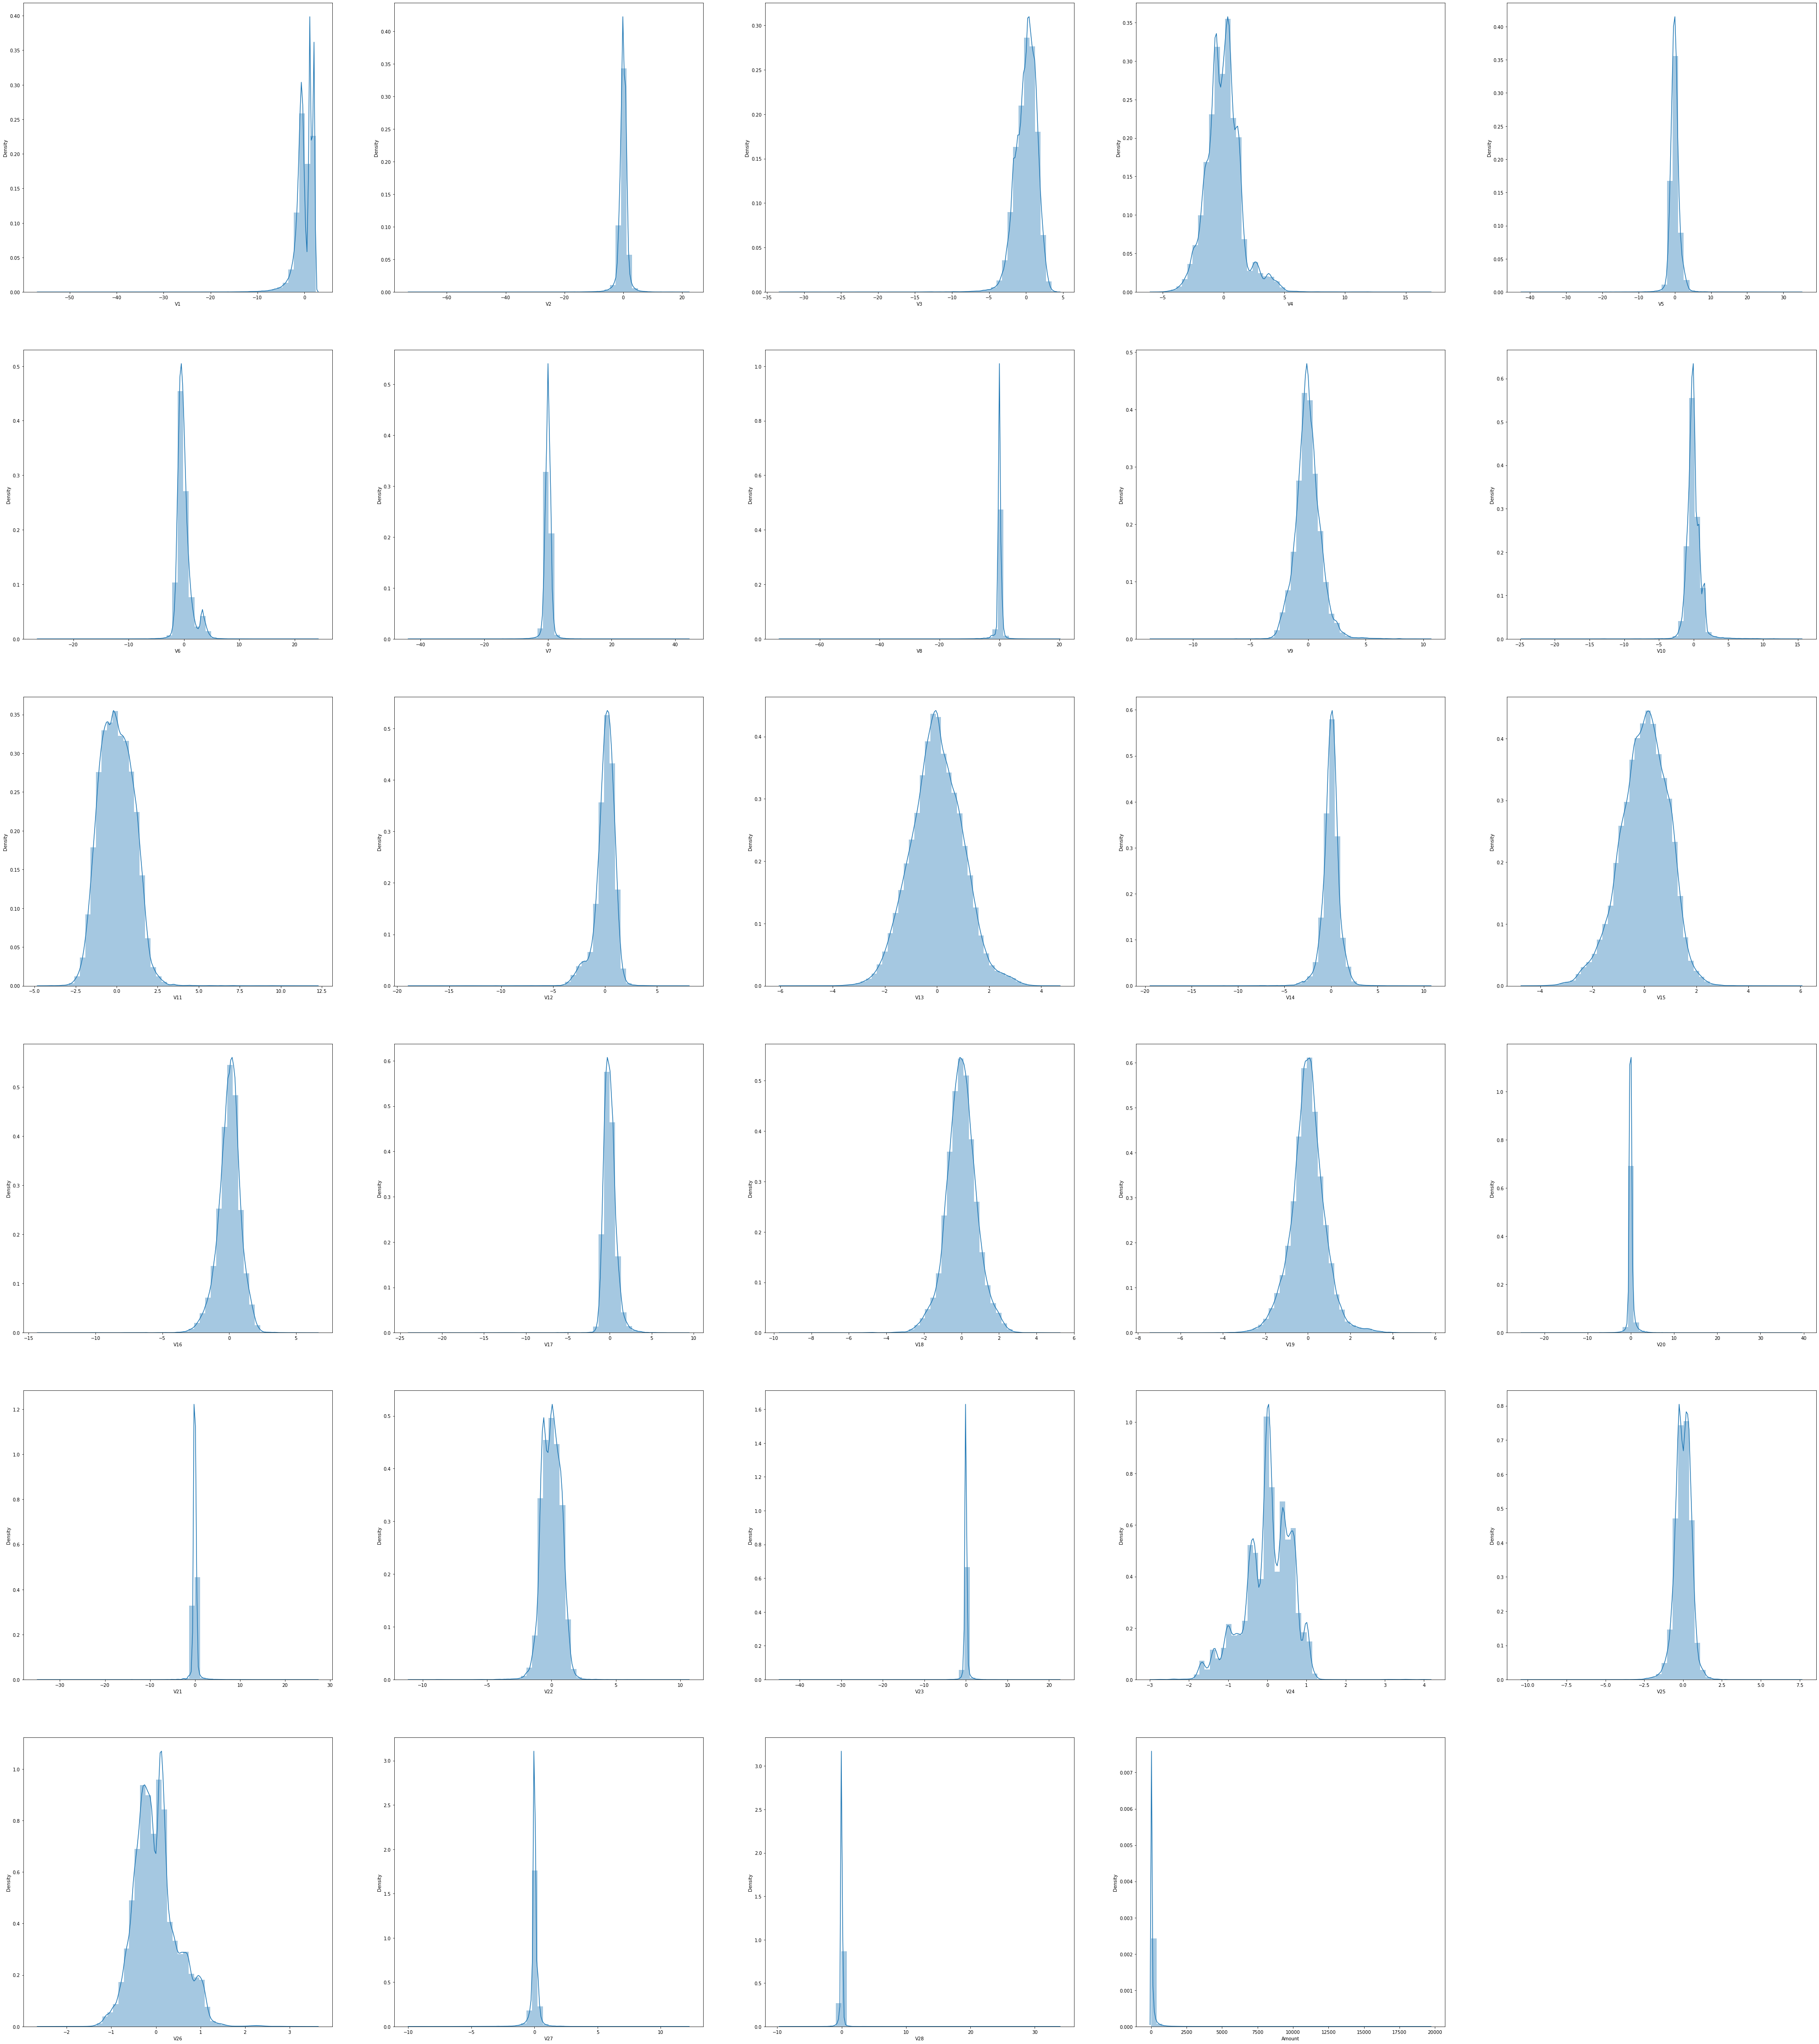

In [16]:
# Doing the same for test

plt.figure(figsize = (70,95))
for i in enumerate(X_test.describe().columns):
    plt.subplot(7,5,i[0]+1)
    sns.distplot(X_train[i[1]])
    plt.xlabel(i[1])

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [17]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PowerTransformer
pt = preprocessing.PowerTransformer(copy=False)
X_train = pt.fit_transform(X_train)


In [18]:
X_train = pd.DataFrame(X_train)



In [19]:
X_test = pt.transform(X_test)

In [20]:
X_test = pd.DataFrame(X_test)

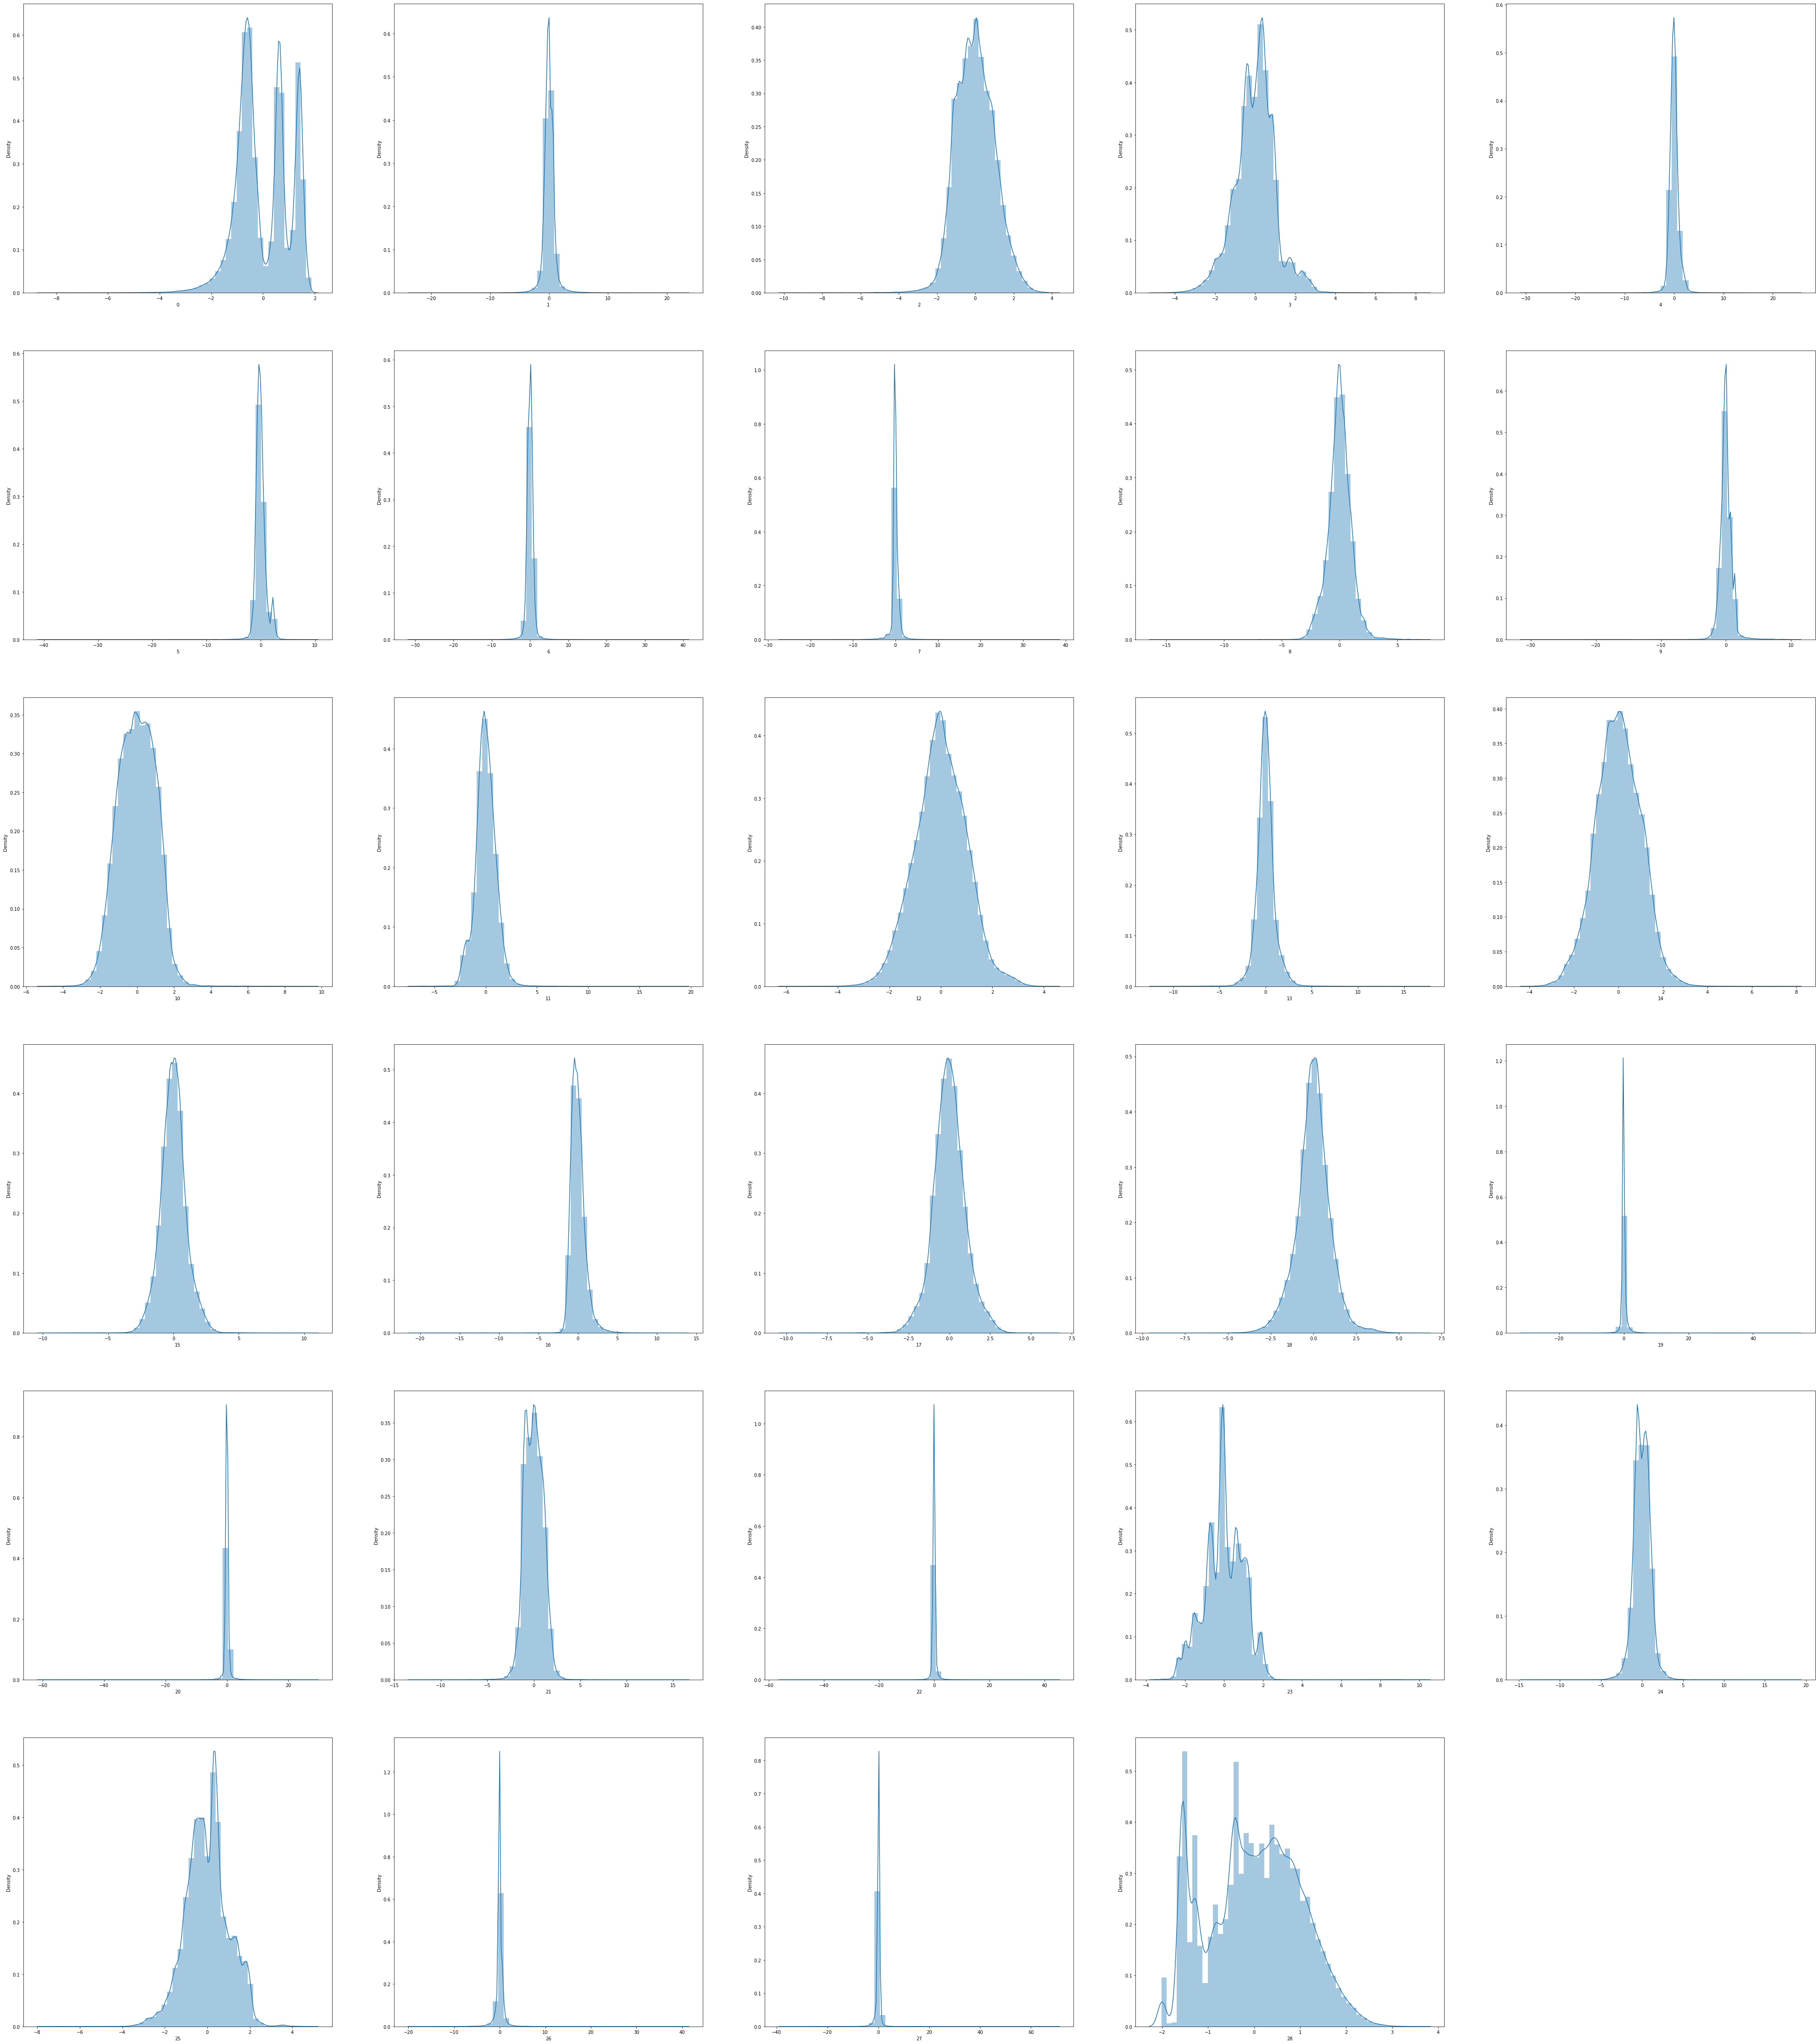

In [21]:
# plot the histogram of a variable from the dataset again to see the result 

plt.figure(figsize = (70,95))
for i in enumerate(X_train.describe().columns):
    plt.subplot(7,5,i[0]+1)
    sns.distplot(X_train[i[1]])
    plt.xlabel(i[1])

We can see that skewness has improved a little

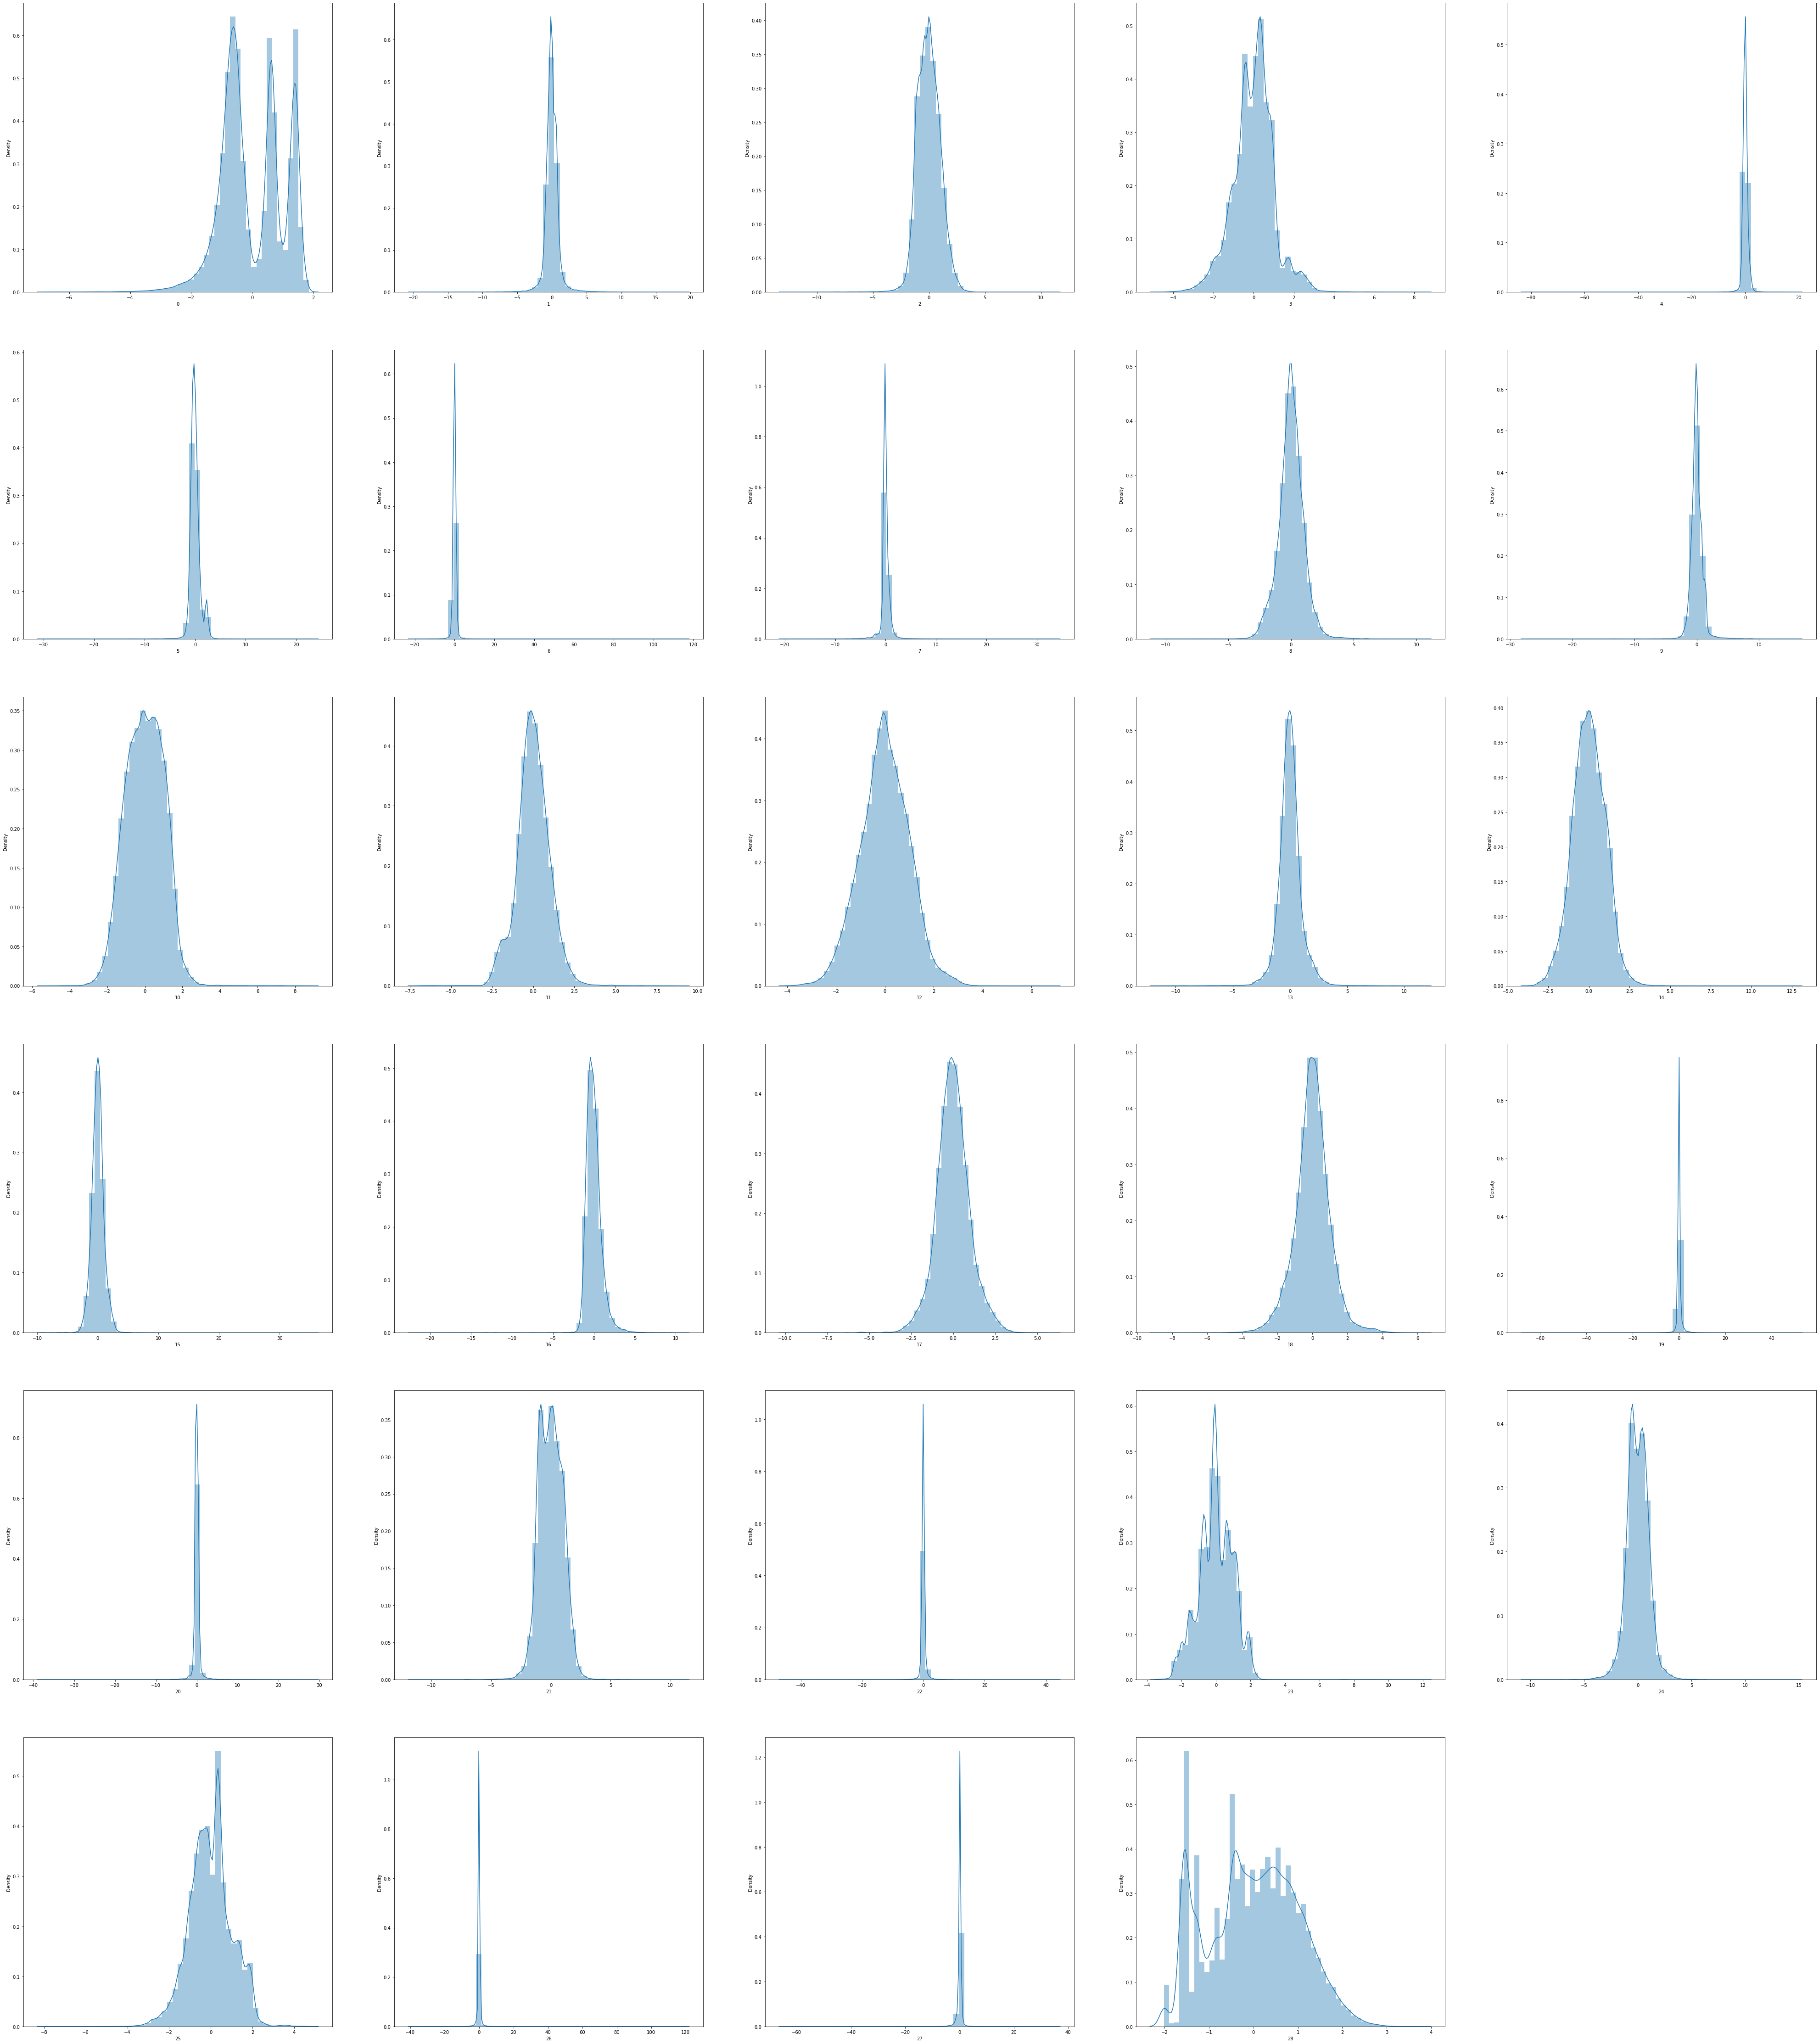

In [22]:
# Checking the same for test

plt.figure(figsize = (70,95))
for i in enumerate(X_test.describe().columns):
    plt.subplot(7,5,i[0]+1)
    sns.distplot(X_test[i[1]])
    plt.xlabel(i[1])

We can see that skewness has improved a little on test as well

## Model Building
- Build different models on the imbalanced dataset and see the result

### Logistic Regression

In [23]:
from sklearn import linear_model 

#import the package
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=100,n_jobs=-1)

num_C = [0.01,0.1,1,10,100,1000]  # list of all hyperparameter values required to be tuned

cv_num= 2 # folds for k-cross validation


 

Here we use cv_num as 2 as data is highly imbalanced and equal distribution of classes is not possible with folds more than 2

In [24]:
#perform cross validation

from sklearn.model_selection import StratifiedKFold
ss = StratifiedKFold(n_splits=cv_num,shuffle=True,random_state=100)  

#### Perform hyperparameter tuning


In [25]:
# Defining the hyperparameter which are required to be tuned and fitting them on training data

from sklearn.model_selection import GridSearchCV


params_lr={'C':num_C}  
grid_search_lr=GridSearchCV(estimator=lr,param_grid=params_lr,cv=ss,n_jobs=-1,verbose=1,scoring='roc_auc')
grid_search_lr.fit(X_train,y_train)


Fitting 2 folds for each of 6 candidates, totalling 12 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=100, shuffle=True),
             estimator=LogisticRegression(n_jobs=-1, random_state=100),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc', verbose=1)

In [26]:
# Getting the best model and best score out

lr_best= grid_search_lr.best_estimator_
print(lr_best)

print(grid_search_lr.best_score_)

LogisticRegression(C=0.01, n_jobs=-1, random_state=100)
0.9787209360751402


So the best hyperparameter is C:0.01

#### We have got ROC_AUC score = 97% so it is a good model to go but we'll find the threshold to get optimum precision and recall

In [27]:
y_train_pred_lr=pd.DataFrame(lr_best.predict_proba(X_train))[1]
y_train_pred_lr

0         0.000251
1         0.000388
2         0.000164
3         0.000193
4         0.001172
            ...   
199359    0.000240
199360    0.000648
199361    0.000535
199362    0.000472
199363    0.000728
Name: 1, Length: 199364, dtype: float64

In [28]:
y_train_pred_final_lr= pd.DataFrame({'Converted': y_train.values,'Conversion_Prob':y_train_pred_lr.values})
y_train_pred_final_lr

,Converted,Conversion_Prob
0,0,0.000251
1,0,0.000388
2,0,0.000164
3,0,0.000193
4,0,0.001172
...,...,...
199359,0,0.000240
199360,0,0.000648
199361,0,0.000535
199362,0,0.000472


In [29]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final_lr.Converted, y_train_pred_final_lr.Conversion_Prob, drop_intermediate = False )


In [30]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

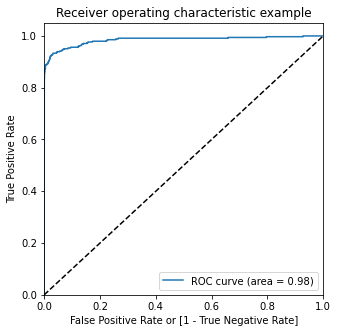

In [31]:
draw_roc(y_train_pred_final_lr.Converted, y_train_pred_final_lr.Conversion_Prob)


As we see that area under the curve i.e ROC_AUC score is  0.98. So it is good model

In [32]:
# Let's create a column with different probability cutt off

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_lr[i]= y_train_pred_final_lr.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_lr.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000251,1,0,0,0,0,0,0,0,0,0
1,0,0.000388,1,0,0,0,0,0,0,0,0,0
2,0,0.000164,1,0,0,0,0,0,0,0,0,0
3,0,0.000193,1,0,0,0,0,0,0,0,0,0
4,0,0.001172,1,0,0,0,0,0,0,0,0,0


In [33]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_lr.Converted, y_train_pred_final_lr[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,precision,recall]
print(cutoff_df)

     prob  accuracy  precision    recall
0.0   0.0  0.001725   0.001725  1.000000
0.1   0.1  0.999343   0.808696  0.811047
0.2   0.2  0.999423   0.882943  0.767442
0.3   0.3  0.999333   0.883636  0.706395
0.4   0.4  0.999283   0.894118  0.662791
0.5   0.5  0.999278   0.906504  0.648256
0.6   0.6  0.999218   0.905172  0.610465
0.7   0.7  0.999172   0.904977  0.581395
0.8   0.8  0.999112   0.899522  0.546512
0.9   0.9  0.999002   0.887701  0.482558


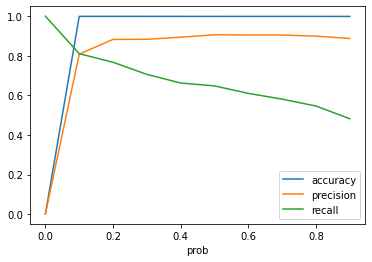

In [34]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','precision','recall'])
plt.show()




Here accuracy is 99.99%  for all the probabilities. So we'll get the threshold probability to be the intersection of precision and recall curve.

Therefore, threshold we choose is 0.1 as difference between precision and recall is minimal at that point

In [35]:
y_train_pred_final_lr['final_predicted'] = y_train_pred_final_lr.Conversion_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final_lr.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000251,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000388,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000164,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000193,1,0,0,0,0,0,0,0,0,0,0
4,0,0.001172,1,0,0,0,0,0,0,0,0,0,0


### Applying the Logistic Regression on Test Data with same Threshold which we got on Train Data

In [36]:
# Predicting y-test

y_test_pred_lr=pd.DataFrame(lr_best.predict_proba(X_test))[1]
y_test_pred_lr

0        0.001604
1        0.005758
2        0.000195
3        0.000162
4        0.000335
           ...   
85438    0.000287
85439    0.000496
85440    0.000213
85441    0.000304
85442    0.000436
Name: 1, Length: 85443, dtype: float64

In [37]:
y_test_pred_final_lr= pd.DataFrame({'Converted': y_test.values,'Conversion_Prob':y_test_pred_lr.values})
y_test_pred_final_lr

,Converted,Conversion_Prob
0,0,0.001604
1,0,0.005758
2,0,0.000195
3,0,0.000162
4,0,0.000335
...,...,...
85438,0,0.000287
85439,0,0.000496
85440,0,0.000213
85441,0,0.000304


In [38]:
y_test_pred_final_lr['final_predicted'] = y_test_pred_final_lr.Conversion_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_test_pred_final_lr.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.001604,0
1,0,0.005758,0
2,0,0.000195,0
3,0,0.000162,0
4,0,0.000335,0


In [39]:
def evaluate_model(dt_classifier,confusion_metric_train,confusion_metric_test):
    print("Train Accuracy :", accuracy_score(y_train_pred_final_lr.Converted, y_train_pred_final_lr.final_predicted))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_pred_final_lr.Converted, y_train_pred_final_lr.final_predicted))
    print("Recall :", confusion_metric_train[1,1]/(confusion_metric_train[1,0]+confusion_metric_train[1,1]))
    print("Precision :", confusion_metric_train[1,1]/(confusion_metric_train[0,1]+confusion_metric_train[1,1]))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test_pred_final_lr.Converted, y_test_pred_final_lr.final_predicted))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test_pred_final_lr.Converted, y_test_pred_final_lr.final_predicted))
    print("Recall :", confusion_metric_test[1,1]/(confusion_metric_test[1,0]+confusion_metric_test[1,1]))
    print("Precision :", confusion_metric_test[1,1]/(confusion_metric_test[0,1]+confusion_metric_test[1,1]))

In [40]:
# Lets build confusion matrix on train and test

confusion_train_lr=confusion_matrix(y_train_pred_final_lr.Converted, y_train_pred_final_lr.final_predicted)

confusion_test_lr=confusion_matrix(y_test_pred_final_lr.Converted, y_test_pred_final_lr.final_predicted)

In [41]:
#print the evaluation result by choosing a evaluation metric

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

evaluate_model(lr_best,confusion_train_lr,confusion_test_lr)

Train Accuracy : 0.9993429104552477
Train Confusion Matrix:
[[198954     66]
 [    65    279]]
Recall : 0.811046511627907
Precision : 0.808695652173913
--------------------------------------------------
Test Accuracy : 0.9992158515033414
Test Confusion Matrix:
[[85260    35]
 [   32   116]]
Recall : 0.7837837837837838
Precision : 0.7682119205298014


We printed the score for each evaluation metric to evaluate the model on overall aspect on train as well as test

In [42]:
#print the optimum value of hyperparameters

print('The Optimum hyperparamter for given Logistic Regression model is :',grid_search_lr.best_params_)

The Optimum hyperparamter for given Logistic Regression model is : {'C': 0.01}


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Trying some of the models from above given list

### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Using cross-validation to check the optimum depth


from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV




# specify number of folds for k-fold CV
n_folds = ss

# parameters to build the model on
parameters = {'max_depth': range(1, 25)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)



In [45]:
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=100, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 25)}, return_train_score=True,
             scoring='roc_auc')

In [46]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.625706,0.125869,0.026382,0.010367,1,{'max_depth': 1},0.837064,0.819647,0.828355,0.008708,23,0.819647,0.837084,0.828365,0.008718
1,0.968598,0.048907,0.034058,0.005399,2,{'max_depth': 2},0.892305,0.860359,0.876332,0.015973,2,0.863279,0.892369,0.877824,0.014545
2,1.643244,0.072943,0.043300,0.004536,3,{'max_depth': 3},0.883626,0.892228,0.887927,0.004301,1,0.869142,0.935929,0.902535,0.033394
3,1.749761,0.085702,0.035792,0.020170,4,{'max_depth': 4},0.930075,0.813849,0.871962,0.058113,10,0.898147,0.938912,0.918529,0.020382
4,2.668335,0.142546,0.023646,0.007993,5,{'max_depth': 5},0.912722,0.790731,0.851727,0.060996,16,0.901219,0.944788,0.923004,0.021784


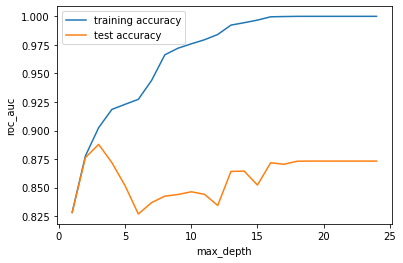

In [47]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel('roc_auc')
plt.legend()
plt.show()

Optimum depth range is 0-4

In [48]:
# Using cross-validation to check the optimum min_samples_leaf

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = ss

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=100, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='roc_auc')

In [49]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,5.221529,0.941260,0.031190,5.269051e-05,5,{'min_samples_leaf': 5},0.915449,0.880619,0.898034,0.017415,10,0.999863,0.999930,0.999896,0.000034
1,4.392079,0.313044,0.031443,1.968145e-04,25,{'min_samples_leaf': 25},0.941323,0.903585,0.922454,0.018869,9,0.999426,0.999719,0.999573,0.000147
2,4.523599,0.698372,0.031243,4.768372e-07,45,{'min_samples_leaf': 45},0.952610,0.914917,0.933764,0.018847,8,0.998949,0.999533,0.999241,0.000292
3,4.001128,0.281809,0.023425,7.802963e-03,65,{'min_samples_leaf': 65},0.955274,0.920338,0.937806,0.017468,4,0.998738,0.999325,0.999032,0.000294
4,4.477444,0.353865,0.029756,1.568317e-03,85,{'min_samples_leaf': 85},0.958088,0.914324,0.936206,0.021882,6,0.998517,0.999201,0.998859,0.000342


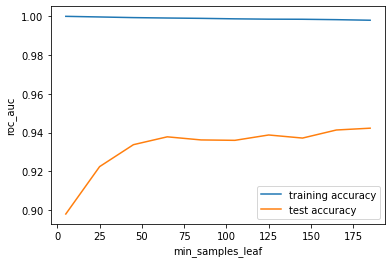

In [50]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel('roc_auc')
plt.legend()
plt.show()

Optimum range is 25-125

In [51]:
# Using cross-validation to check the optimum min_samples_split

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = ss

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=100, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='roc_auc')

In [52]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,5.423970,0.663747,0.023387,0.007790,5,{'min_samples_split': 5},0.918297,0.831220,0.874759,0.043539,10,1.000000,0.999999,0.999999,2.629162e-07
1,5.097124,0.296592,0.031467,0.000224,25,{'min_samples_split': 25},0.935645,0.892191,0.913918,0.021727,9,0.999934,0.999974,0.999954,2.015691e-05
2,5.665236,0.739172,0.062727,0.015863,45,{'min_samples_split': 45},0.935657,0.892192,0.913925,0.021733,8,0.999922,0.999953,0.999938,1.555587e-05
3,5.560022,0.337349,0.070720,0.007746,65,{'min_samples_split': 65},0.938511,0.892145,0.915328,0.023183,7,0.999878,0.999944,0.999911,3.279149e-05
4,5.040319,0.889433,0.046867,0.015624,85,{'min_samples_split': 85},0.947034,0.900731,0.923883,0.023151,6,0.999685,0.999911,0.999798,1.133607e-04


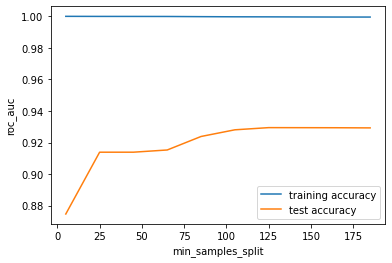

In [53]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel('roc_auc')
plt.legend()
plt.show()

Range is 75-125

In [54]:
# Now we will be running the model with grid search to find the optimal hyper parameter

dt=DecisionTreeClassifier()

params={
    'max_depth': range(1, 5, 2),
    'min_samples_leaf': range(25, 125, 25),
    'min_samples_split': range(75, 125, 15)
}

grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=ss,n_jobs=-1,verbose=1,scoring='roc_auc')


grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=100, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 5, 2),
                         'min_samples_leaf': range(25, 125, 25),
                         'min_samples_split': range(75, 125, 15)},
             scoring='roc_auc', verbose=1)

In [55]:
# printing the optimal ROC_AUC score score and hyperparameters

print('We can get ROC_AUC score of',grid_search.best_score_.round(2)*100,'% using :',grid_search.best_params_)

We can get ROC_AUC score of 92.0 % using : {'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 75}


So here also we can see that ROC_AUC score is coming out to be 92% 


---------------------------------------------------------------------------------------------------------------------------------

### Random Forest

In [56]:
# Importing the package

from sklearn.ensemble import RandomForestClassifier


In [57]:
# Instantiating a random forest model

rf= RandomForestClassifier(random_state=100,n_jobs=-1,oob_score=True)

In [58]:
# Defining the range of hyperparamters for tuning and doing cross-validation with those on X_train and y_train

params_rf={
    'max_depth': range(1, 5, 2),
    'min_samples_leaf': range(25, 125, 25),
    'min_samples_split': range(75, 125, 15),
    'n_estimators': [10,15,20], 
    'max_features': [5, 10]
}

grid_search_rf=GridSearchCV(estimator=rf,param_grid=params_rf,cv=ss,n_jobs=-1,verbose=1,scoring='roc_auc')


grid_search_rf.fit(X_train,y_train)

Fitting 2 folds for each of 192 candidates, totalling 384 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 5, 2), 'max_features': [5, 10],
                         'min_samples_leaf': range(25, 125, 25),
                         'min_samples_split': range(75, 125, 15),
                         'n_estimators': [10, 15, 20]},
             scoring='roc_auc', verbose=1)

In [59]:
# printing the optimal ROC_AUC score score and hyperparameters

print('We can get ROC_AUC score of',grid_search_rf.best_score_.round(3)*100,'% using :',grid_search_rf.best_params_)

We can get ROC_AUC score of 94.89999999999999 % using : {'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 75, 'n_estimators': 20}


So here also we can see that 'ROC_AUC score is coming out to be 94.89%.





------------------------------------------------------------------------------------------------------------------------------

### XGBoost

In [60]:
# Importing the Package

from xgboost import XGBClassifier

In [61]:
## Crossvalidation to find optimal max_depth


from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV




# specify number of folds for k-fold CV
n_folds = ss

# parameters to build the model on
parameters = {'max_depth': range(1, 25)}

# instantiate the model

xgb1=XGBClassifier(random_state=100,n_jobs=-1)




# fit tree on training data
model_1 = GridSearchCV(xgb1, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',return_train_score=True)
model_1.fit(X_train, y_train)

[16:36:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:36:38] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:36:40] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:36:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[16:40:25] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:42] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:40:50] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, reg_alpha=None,
               

In [62]:
scores = model_1.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,2.485026,0.101671,0.054676,0.007812,1,{'max_depth': 1},0.982610,0.976322,0.979466,0.003144,1,0.991542,0.996714,0.994128,0.002586
1,5.089828,0.100059,0.060677,0.001811,2,{'max_depth': 2},0.982254,0.973530,0.977892,0.004362,20,0.999839,0.999994,0.999916,0.000077
2,6.929858,0.454327,0.061180,0.001307,3,{'max_depth': 3},0.981753,0.966667,0.974210,0.007543,24,1.000000,1.000000,1.000000,0.000000
3,7.672012,0.630631,0.070435,0.008060,4,{'max_depth': 4},0.981604,0.969970,0.975787,0.005817,23,1.000000,1.000000,1.000000,0.000000
4,7.912875,0.628309,0.067933,0.005057,5,{'max_depth': 5},0.981541,0.971988,0.976764,0.004777,21,1.000000,1.000000,1.000000,0.000000


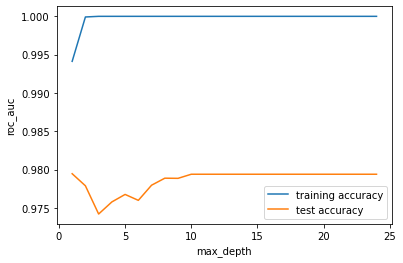

In [63]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel('roc_auc')
plt.legend()
plt.show()

Optimum range is from 6-11

In [64]:
# Cross validation to find optimum 'Learning Rate'

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV




# specify number of folds for k-fold CV
n_folds = ss

# parameters to build the model on
parameters = {'learning_rate': range(1, 5)}

# instantiate the model

xgb1=XGBClassifier(random_state=100,n_jobs=-1)




# fit tree on training data
model_1 = GridSearchCV(xgb1, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',return_train_score=True)
model_1.fit(X_train, y_train)

[16:43:18] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:27] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:43:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, reg_alpha=None,
               

In [65]:
scores = model_1.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,4.629759,0.471048,0.062678,1.920462e-04,1,{'learning_rate': 1},0.984281,0.966759,0.975520,0.008761,1,1.000000,1.000000,1.000000,0.000000
1,3.412230,0.085831,0.070685,7.810235e-03,2,{'learning_rate': 2},0.969891,0.955307,0.962599,0.007292,2,1.000000,1.000000,1.000000,0.000000
2,3.445632,0.512323,0.039252,8.006692e-03,3,{'learning_rate': 3},0.479690,0.649562,0.564626,0.084936,4,0.485180,0.675698,0.580439,0.095259
3,1.562462,0.266291,0.031633,1.192093e-07,4,{'learning_rate': 4},0.848727,0.502177,0.675452,0.173275,3,0.810916,0.502032,0.656474,0.154442


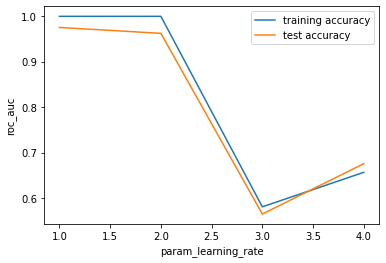

In [66]:
plt.figure()
plt.plot(scores["param_learning_rate"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_learning_rate"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_learning_rate")
plt.ylabel('roc_auc')
plt.legend()
plt.show()

Optimal Learning Rate is 1

In [67]:
# Cross validation to find optimum 'reg_alpha'

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV




# specify number of folds for k-fold CV
n_folds = ss

# parameters to build the model on
parameters = {'reg_alpha': range(0, 7)}

# instantiate the model

xgb1=XGBClassifier(random_state=100,n_jobs=-1)




# fit tree on training data
model_1 = GridSearchCV(xgb1, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',return_train_score=True)
model_1.fit(X_train, y_train)

[16:43:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:24] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, reg_alpha=None,
               

In [68]:
scores = model_1.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_alpha,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,8.236324,0.690259,0.070493,0.007615,0,{'reg_alpha': 0},0.983053,0.968933,0.975993,0.007060,7,1.000000,1.000000,1.000000,0.000000e+00
1,8.183383,0.971968,0.059375,0.003504,1,{'reg_alpha': 1},0.983507,0.970599,0.977053,0.006454,5,1.000000,1.000000,1.000000,0.000000e+00
2,7.569463,0.576410,0.062876,0.000002,2,{'reg_alpha': 2},0.985417,0.967848,0.976632,0.008784,6,0.999999,0.999998,0.999999,9.640261e-07
3,7.119679,0.597612,0.062682,0.000194,3,{'reg_alpha': 3},0.985169,0.968950,0.977060,0.008110,4,0.999990,0.999977,0.999983,6.485266e-06
4,6.840345,0.465533,0.054868,0.008003,4,{'reg_alpha': 4},0.988237,0.974793,0.981515,0.006722,3,0.999935,0.999908,0.999922,1.340873e-05


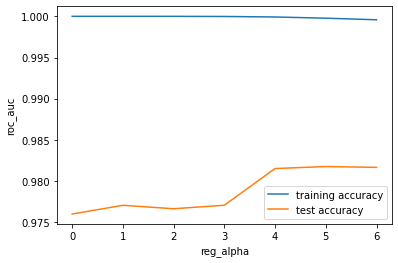

In [69]:
plt.figure()
plt.plot(scores["param_reg_alpha"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_reg_alpha"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("reg_alpha")
plt.ylabel('roc_auc')
plt.legend()
plt.show()

Optimum are 3 and 4

In [70]:
# Cross validation to find optimum 'reg_lambda'

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV




# specify number of folds for k-fold CV
n_folds = ss

# parameters to build the model on
parameters = {'reg_lambda': range(0, 8)}

# instantiate the model

xgb1=XGBClassifier(random_state=100,n_jobs=-1)




# fit tree on training data
model_1 = GridSearchCV(xgb1, parameters, 
                    cv=n_folds, 
                   scoring='roc_auc',return_train_score=True)
model_1.fit(X_train, y_train)

[16:45:59] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:23] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, reg_alpha=None,
               

In [71]:
scores = model_1.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,7.638662,0.455682,0.071993,0.009118,0,{'reg_lambda': 0},0.979544,0.976164,0.977854,0.001690,4,1.0,1.0,1.0,0.0
1,8.283294,0.724883,0.070688,0.007811,1,{'reg_lambda': 1},0.983053,0.968933,0.975993,0.007060,7,1.0,1.0,1.0,0.0
2,8.838699,0.725362,0.077996,0.000503,2,{'reg_lambda': 2},0.983276,0.968682,0.975979,0.007297,8,1.0,1.0,1.0,0.0
3,9.260561,0.786305,0.070685,0.007807,3,{'reg_lambda': 3},0.981917,0.974745,0.978331,0.003586,2,1.0,1.0,1.0,0.0
4,9.735605,0.756131,0.070689,0.007810,4,{'reg_lambda': 4},0.984028,0.971845,0.977937,0.006091,3,1.0,1.0,1.0,0.0


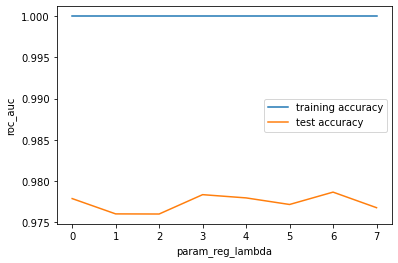

In [72]:
plt.figure()
plt.plot(scores["param_reg_lambda"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_reg_lambda"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_reg_lambda")
plt.ylabel('roc_auc')
plt.legend()
plt.show()

0,3,6 are optimum

In [73]:
# Instantiating the model for the final time

xgb=XGBClassifier(random_state=100,n_jobs=16)

In [74]:
# Defining all the hyperparameters for tuning

params_xgb={
    'max_depth': [1,10],
    'learning_rate': [1],
    'reg_lambda':[0,3,6],
    'subsample':[0.3,0.6,0.9]
}

In [75]:
grid_search_xgb=GridSearchCV(estimator=xgb,param_grid=params_xgb,cv=ss,n_jobs=16,verbose=1,scoring='roc_auc')
grid_search_xgb.fit(X_train,y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[16:50:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=16,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, reg_alpha=None,
                              

In [76]:
print('We can get ROC_AUC score of',(grid_search_xgb.best_score_*100).round(2),'% using :',grid_search_xgb.best_params_)

We can get ROC_AUC score of 97.91 % using : {'learning_rate': 1, 'max_depth': 10, 'reg_lambda': 6, 'subsample': 0.9}


Here we can see that ROC_AUC score is coming out to be 97.9%.


#### Hence, we can conclude that XGBoost is the best algorithm to go with.

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Model which gives the best result is XGBoost(ROC_AUC score is 99%)

In [77]:
# Fitting optimum model on train

clf =XGBClassifier(random_state=100,n_jobs=16, learning_rate= 1, max_depth= 10, reg_lambda= 6, subsample=0.9) #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)


[16:51:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=6, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
y_train_pred_xgb=pd.DataFrame(clf.predict_proba(X_train))[1]
y_train_pred_xgb

0         7.332443e-09
1         1.085049e-06
2         3.152086e-07
3         6.100637e-08
4         9.910119e-07
              ...     
199359    5.091657e-08
199360    3.807250e-07
199361    2.516034e-06
199362    1.433166e-07
199363    1.098930e-06
Name: 1, Length: 199364, dtype: float32

In [79]:
y_train_pred_final_xgb= pd.DataFrame({'Converted': y_train.values,'Conversion_Prob':y_train_pred_xgb.values})
y_train_pred_final_xgb

,Converted,Conversion_Prob
0,0,7.332443e-09
1,0,1.085049e-06
2,0,3.152086e-07
3,0,6.100637e-08
4,0,9.910119e-07
...,...,...
199359,0,5.091657e-08
199360,0,3.807250e-07
199361,0,2.516034e-06
199362,0,1.433166e-07


In [80]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final_xgb.Converted, y_train_pred_final_xgb.Conversion_Prob, drop_intermediate = False )






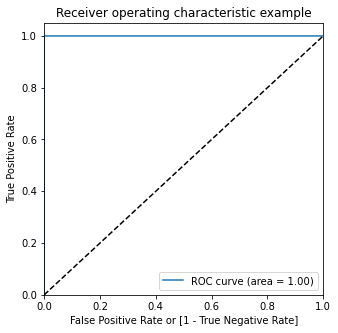

In [81]:
draw_roc(y_train_pred_final_xgb.Converted, y_train_pred_final_xgb.Conversion_Prob)


In [82]:
# Let's now create a column with different probability cutt off to find the optimum threshold on given best model

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_xgb[i]= y_train_pred_final_xgb.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_xgb.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,7.332443e-09,1,0,0,0,0,0,0,0,0,0
1,0,1.085049e-06,1,0,0,0,0,0,0,0,0,0
2,0,3.152086e-07,1,0,0,0,0,0,0,0,0,0
3,0,6.100637e-08,1,0,0,0,0,0,0,0,0,0
4,0,9.910119e-07,1,0,0,0,0,0,0,0,0,0


In [83]:
# Now let's calculate accuracy precision and recall for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_xgb.Converted, y_train_pred_final_xgb[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,precision,recall]
print(cutoff_df)

     prob  accuracy  precision    recall
0.0   0.0  0.001725   0.001725  1.000000
0.1   0.1  1.000000   1.000000  1.000000
0.2   0.2  1.000000   1.000000  1.000000
0.3   0.3  1.000000   1.000000  1.000000
0.4   0.4  1.000000   1.000000  1.000000
0.5   0.5  1.000000   1.000000  1.000000
0.6   0.6  1.000000   1.000000  1.000000
0.7   0.7  1.000000   1.000000  1.000000
0.8   0.8  1.000000   1.000000  1.000000
0.9   0.9  0.999995   1.000000  0.997093


<Figure size 360x360 with 0 Axes>

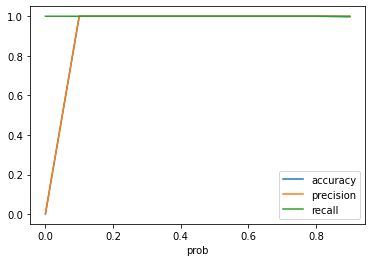

Cuttoff threshold is: 0.87247705


In [84]:
# Let's plot accuracy precision and recall for various probabilities.
plt.figure(figsize=[5,5])
cutoff_df.plot.line(x='prob', y=['accuracy','precision','recall'])
plt.show()

threshold = thresholds[np.argmax(tpr-fpr)]
print('Cuttoff threshold is:',threshold)

We can consider Threshold to be at 0.87 as we are getting similar values of precision and recall. And accuracy is also good at that point.

In [85]:
y_train_pred_final_xgb['final_predicted'] = y_train_pred_final_xgb.Conversion_Prob.map( lambda x: 1 if x > 0.87 else 0)

y_train_pred_final_xgb.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,7.332443e-09,1,0,0,0,0,0,0,0,0,0,0
1,0,1.085049e-06,1,0,0,0,0,0,0,0,0,0,0
2,0,3.152086e-07,1,0,0,0,0,0,0,0,0,0,0
3,0,6.100637e-08,1,0,0,0,0,0,0,0,0,0,0
4,0,9.910119e-07,1,0,0,0,0,0,0,0,0,0,0


#### Predicting the model on test data

In [86]:
# Predicting y-test

y_test_pred_xgb=pd.DataFrame(clf.predict_proba(X_test))[1]
y_test_pred_xgb

0        9.004893e-05
1        2.692461e-06
2        3.104250e-08
3        1.194862e-06
4        7.557689e-08
             ...     
85438    2.229209e-08
85439    6.236252e-05
85440    1.757333e-07
85441    2.133706e-07
85442    3.595427e-04
Name: 1, Length: 85443, dtype: float32

In [87]:
y_test_pred_final_xgb= pd.DataFrame({'Converted': y_test.values,'Conversion_Prob':y_test_pred_xgb.values})
y_test_pred_final_xgb

,Converted,Conversion_Prob
0,0,9.004893e-05
1,0,2.692461e-06
2,0,3.104250e-08
3,0,1.194862e-06
4,0,7.557689e-08
...,...,...
85438,0,2.229209e-08
85439,0,6.236252e-05
85440,0,1.757333e-07
85441,0,2.133706e-07


In [88]:
y_test_pred_final_xgb['final_predicted'] = y_test_pred_final_xgb.Conversion_Prob.map( lambda x: 1 if x > 0.87 else 0)

y_test_pred_final_xgb.head()

,Converted,Conversion_Prob,final_predicted
0,0,9.004893e-05,0
1,0,2.692461e-06,0
2,0,3.104250e-08,0
3,0,1.194862e-06,0
4,0,7.557689e-08,0


In [89]:
# Evaluating the Model

def evaluate_model(dt_classifier,confusion_metric_train,confusion_metric_test):
    print("Train Accuracy :", accuracy_score(y_train_pred_final_xgb.Converted, y_train_pred_final_xgb.final_predicted))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_pred_final_xgb.Converted, y_train_pred_final_xgb.final_predicted))
    print("Recall :", confusion_metric_train[1,1]/(confusion_metric_train[1,0]+confusion_metric_train[1,1]))
    print("Precision :", confusion_metric_train[1,1]/(confusion_metric_train[0,1]+confusion_metric_train[1,1]))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test_pred_final_xgb.Converted, y_test_pred_final_xgb.final_predicted))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test_pred_final_xgb.Converted, y_test_pred_final_xgb.final_predicted))
    print("Recall :", confusion_metric_test[1,1]/(confusion_metric_test[1,0]+confusion_metric_test[1,1]))
    print("Precision :", confusion_metric_test[1,1]/(confusion_metric_test[0,1]+confusion_metric_test[1,1]))

In [90]:
# Lets build confusion matrix on train=cm1 and test=cm2

confusion_train_xgb=confusion_matrix(y_train_pred_final_xgb.Converted, y_train_pred_final_xgb.final_predicted)

confusion_test_xgb=confusion_matrix(y_test_pred_final_xgb.Converted, y_test_pred_final_xgb.final_predicted)


In [91]:
# Evaluating the model performance with respect to each relavant metrics on train and test

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

evaluate_model(clf,confusion_train_xgb,confusion_test_xgb)

Train Accuracy : 1.0
Train Confusion Matrix:
[[199020      0]
 [     0    344]]
Recall : 1.0
Precision : 1.0
--------------------------------------------------
Test Accuracy : 0.9994499256814484
Test Confusion Matrix:
[[85287     8]
 [   39   109]]
Recall : 0.7364864864864865
Precision : 0.9316239316239316


Hence, above given is the evalueation result of XGBoost model on unbalanced dataset with respect to each evaluation metric

As we see that model overfits on train data so there's a huge difference in scoring metrics of train and test

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 4


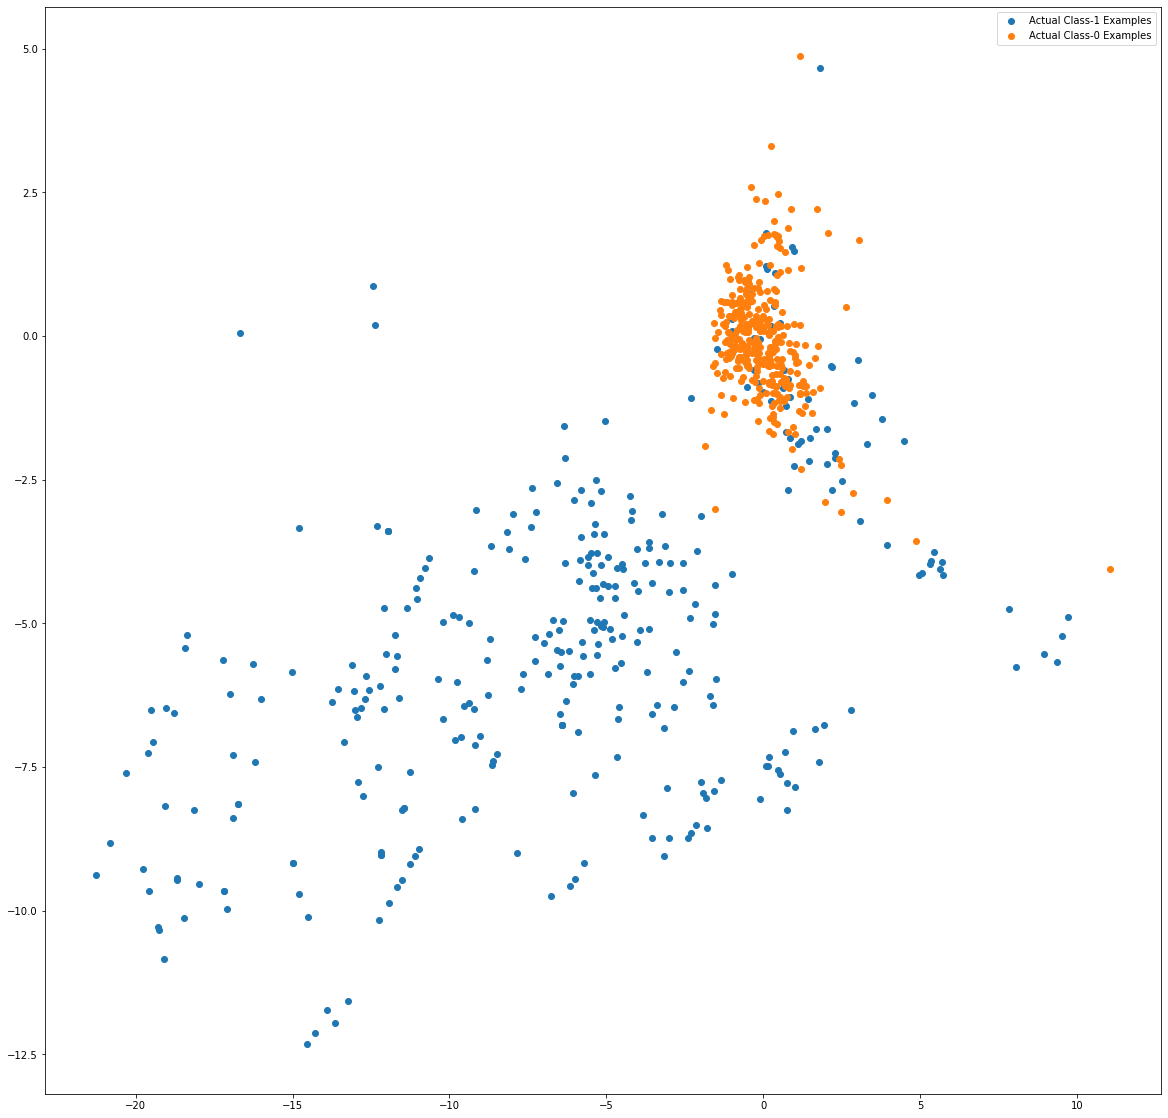

In [92]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-17 and Index-14 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()
plt.show()

As shown above, the most optimum features are having index 17,14 and 4

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

In [93]:
# Importing Over-Sampling Libraries

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

#### Random Over Sampling



In [94]:
X_ros, y_ros = RandomOverSampler().fit_resample(X, y)

X_ros_train,X_ros_test,y_ros_train,y_ros_test=train_test_split(X_ros,y_ros,train_size=0.7,test_size=0.3,random_state=100,stratify=y_ros)

print(X_ros_train.shape)
print(X_ros_test.shape)

print(y_ros_train.shape)
print(y_ros_test.shape)


(398041, 29)
(170589, 29)
(398041,)
(170589,)


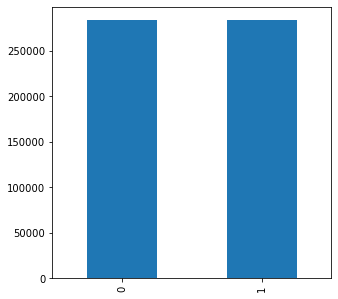

In [95]:
# Checking the class-weightage of the balanced data
plt.figure(figsize=(5,5))
y_ros.value_counts().plot.bar()

plt.show()




Now data seems to be balanced

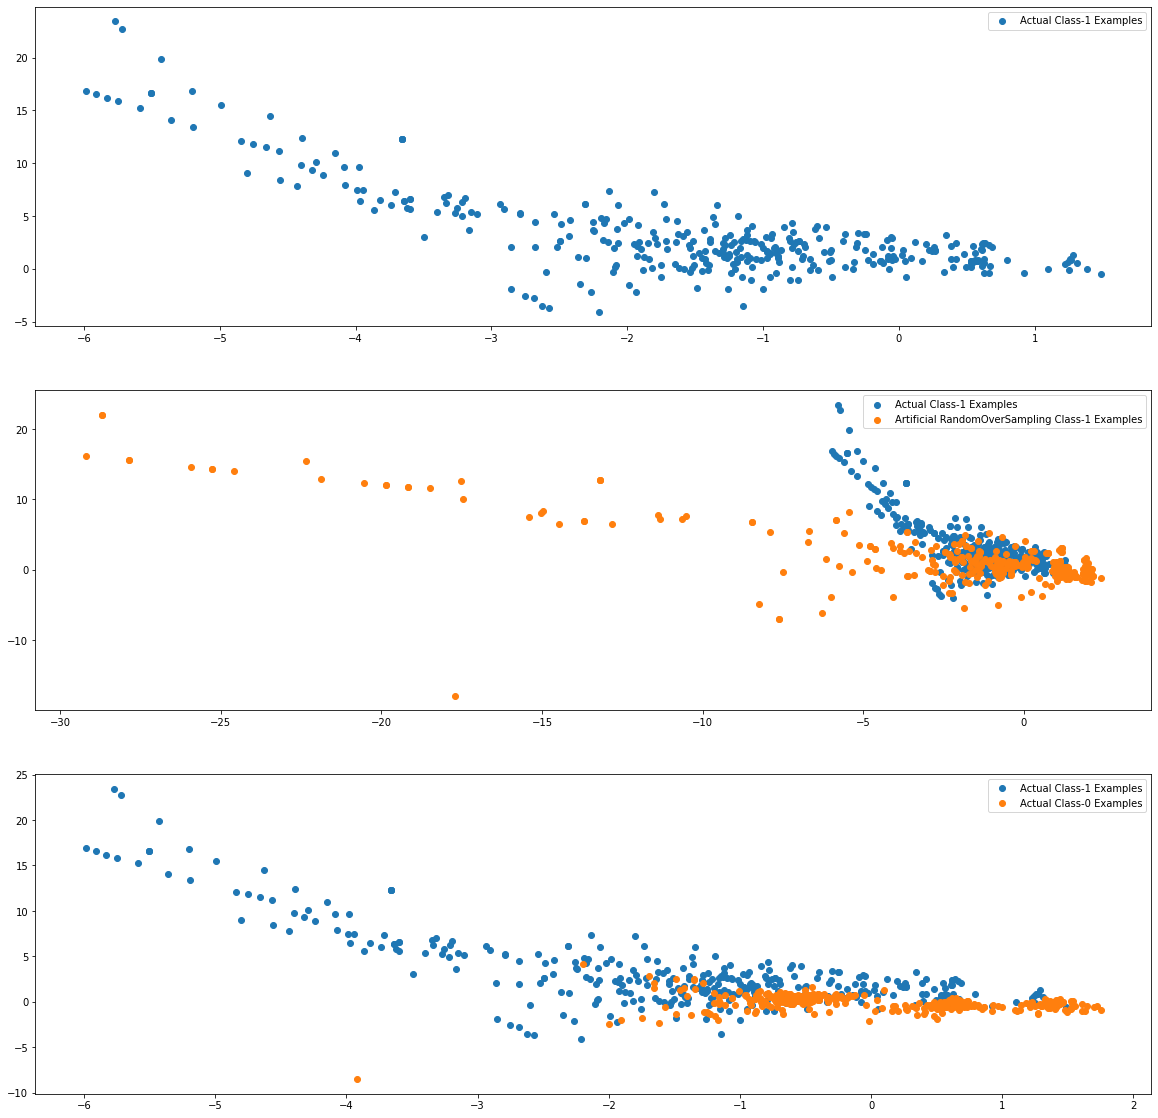

In [96]:
# Lets check its class distribution

X_train_ros_1 = X_ros_train[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ros_1.iloc[:X_train_1.shape[0],0], X_train_ros_1.iloc[:X_train_1.shape[0],1],
            label='Artificial RandomOverSampling Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

#### SMOTE

In [97]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

X_smote_train,X_smote_test,y_smote_train,y_smote_test=train_test_split(X_smote,y_smote,train_size=0.7,test_size=0.3,random_state=100,stratify=y_smote)

print(X_smote_train.shape)
print(X_smote_test.shape)

print(y_smote_train.shape)
print(y_smote_test.shape)

(398041, 29)
(170589, 29)
(398041,)
(170589,)


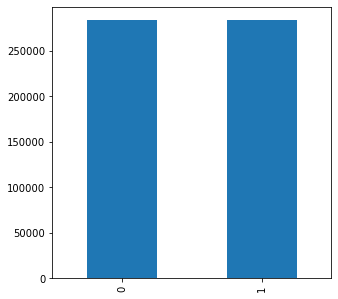

In [98]:
# Checking the class-weightage of the balanced data
plt.figure(figsize=(5,5))
y_smote.value_counts().plot.bar()

plt.show()

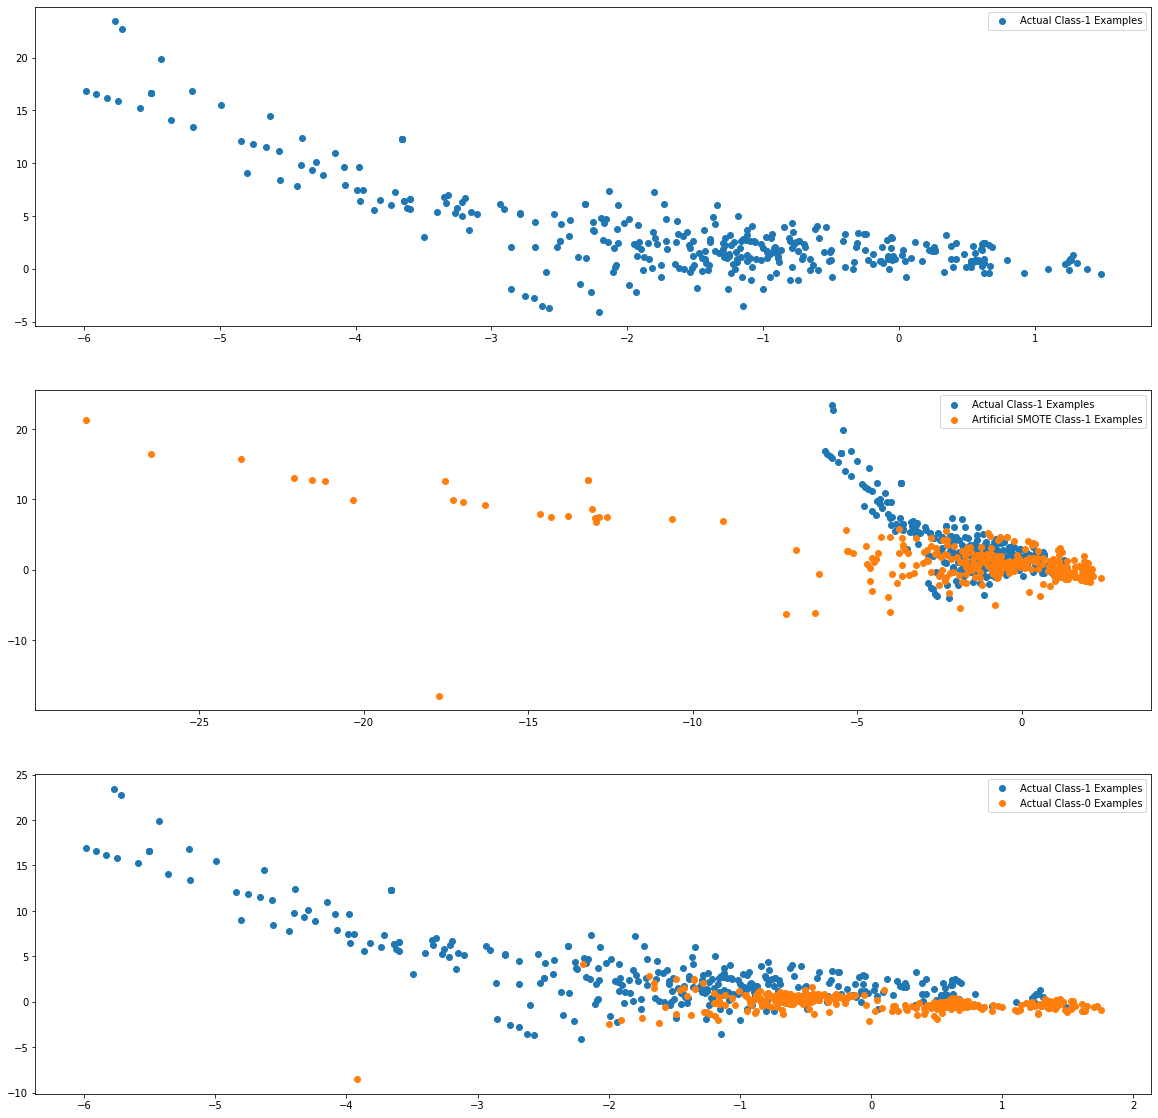

In [99]:
# Lets check its class distribution


X_train_smote_1 = X_smote_train[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0],0], X_train_smote_1.iloc[:X_train_1.shape[0],1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

#### ADASYN

In [100]:
X_ada, y_ada = ADASYN().fit_resample(X, y)

X_ada_train,X_ada_test,y_ada_train,y_ada_test=train_test_split(X_ada,y_ada,train_size=0.7,test_size=0.3,random_state=100,stratify=y_ada)

print(X_ada_train.shape)
print(X_ada_test.shape)

print(y_ada_train.shape)
print(y_ada_test.shape)

(397988, 29)
(170567, 29)
(397988,)
(170567,)


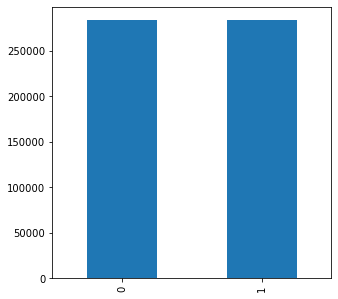

In [101]:
# Checking the class-weightage of the balanced data

plt.figure(figsize=[5,5])
y_ada.value_counts().plot.bar()

plt.show()

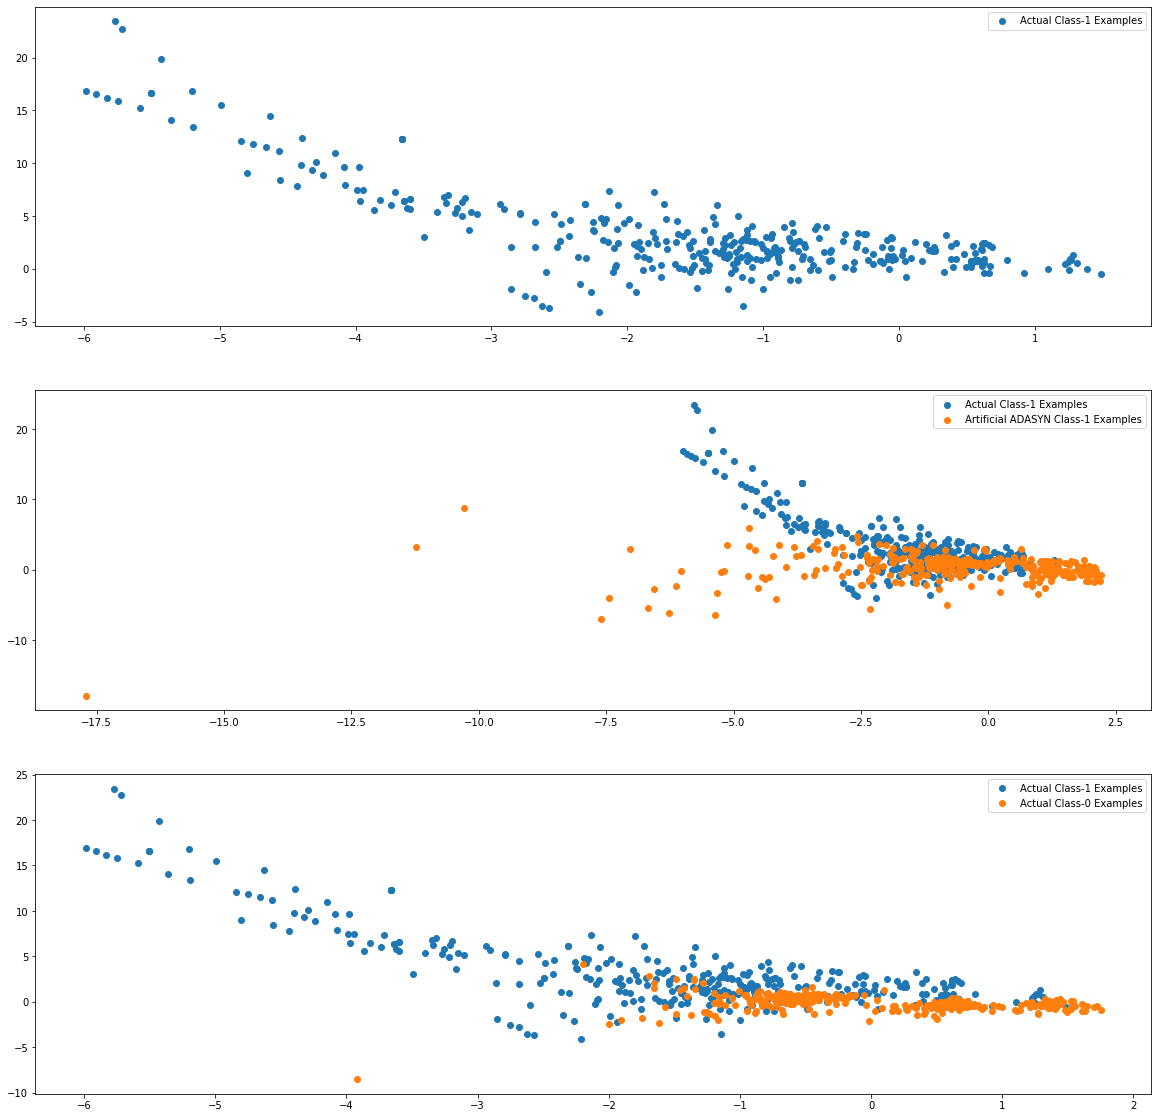

In [102]:
# Lets check its class distribution


X_train_ada_1 = X_ada_train[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ada_1.iloc[:X_train_1.shape[0],0], X_train_ada_1.iloc[:X_train_1.shape[0],1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()
plt.show()

## Model Building
- Build different models on the balanced dataset and see the result

# Logistic Regression on Different Datasets

## Random Over Sampled Data

In [103]:
# Logistic Regression
from sklearn import linear_model 
lr=LogisticRegression(random_state=100,n_jobs=-1)

num_C = [0.01,0.1,1,10,100,1000]  # list of all hyperparameter values required to be tuned

cv_num= 4 # folds for k-cross validation. Here we are putting it to be 4 as data will be balanced



Here we use cv_num = 4 as data is balanced now and equal distribution of classes is  possible with more number of folds 


In [104]:
#perform cross validation

from sklearn.model_selection import StratifiedKFold
ss_bal = StratifiedKFold(n_splits=cv_num,shuffle=True,random_state=100) 

#### Perform hyperparameter tuning


In [105]:
# Defining the hyperparameter which are required to be tuned and fitting them on training data

from sklearn.model_selection import GridSearchCV


params_lr={'C':num_C}  
grid_search_bal_lr=GridSearchCV(estimator=lr,param_grid=params_lr,cv=ss_bal,n_jobs=-1,verbose=1,scoring='roc_auc')
grid_search_bal_lr.fit(X_ros_train,y_ros_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(n_jobs=-1, random_state=100),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc', verbose=1)

In [106]:
# Getting the best model and best score out

lr_best= grid_search_bal_lr.best_estimator_
print(lr_best)

print(grid_search_bal_lr.best_score_)

LogisticRegression(C=0.1, n_jobs=-1, random_state=100)
0.9858347009582656


In [107]:
print('So the best ROC_AUC score we are getting is:',grid_search_bal_lr.best_score_,'using the given paramter',grid_search_bal_lr.best_params_)

So the best ROC_AUC score we are getting is: 0.9858347009582656 using the given paramter {'C': 0.1}


#### We have got ROC_AUC score = 98.6% so it is a good model to go but we'll find the threshold to get optimum precision and recall


In [108]:
y_train_pred_lr=pd.DataFrame(lr_best.predict_proba(X_ros_train))[1]
y_train_pred_lr

0         1.000000
1         0.067123
2         0.025833
3         1.000000
4         1.000000
            ...   
398036    1.000000
398037    1.000000
398038    1.000000
398039    0.006290
398040    0.002983
Name: 1, Length: 398041, dtype: float64

In [109]:
y_train_pred_final_lr= pd.DataFrame({'Converted': y_ros_train.values,'Conversion_Prob':y_train_pred_lr.values})
y_train_pred_final_lr

,Converted,Conversion_Prob
0,1,1.000000
1,0,0.067123
2,0,0.025833
3,1,1.000000
4,1,1.000000
...,...,...
398036,1,1.000000
398037,1,1.000000
398038,1,1.000000
398039,0,0.006290


In [110]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final_lr.Converted, y_train_pred_final_lr.Conversion_Prob, drop_intermediate = False )



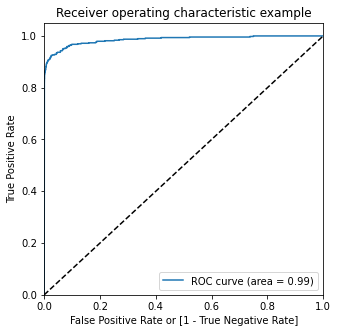

In [111]:
draw_roc(y_train_pred_final_lr.Converted, y_train_pred_final_lr.Conversion_Prob)


So 'Area under the curve' is also 99%. 

In [112]:
# Let's create a column with different probability cutt off

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_lr[i]= y_train_pred_final_lr.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_lr.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,1.000000,1,1,1,1,1,1,1,1,1,1
1,0,0.067123,1,0,0,0,0,0,0,0,0,0
2,0,0.025833,1,0,0,0,0,0,0,0,0,0
3,1,1.000000,1,1,1,1,1,1,1,1,1,1
4,1,1.000000,1,1,1,1,1,1,1,1,1,1


In [113]:
# Now let's calculate accuracy precision and recall for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_lr.Converted, y_train_pred_final_lr[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,precision,recall]
print(cutoff_df)

     prob  accuracy  precision    recall
0.0   0.0  0.500001   0.500001  1.000000
0.1   0.1  0.881158   0.818550  0.979429
0.2   0.2  0.931861   0.902995  0.967677
0.3   0.3  0.941521   0.940329  0.942875
0.4   0.4  0.945717   0.961309  0.928817
0.5   0.5  0.948126   0.974026  0.920807
0.6   0.6  0.946038   0.981990  0.908743
0.7   0.7  0.943699   0.987609  0.898674
0.8   0.8  0.940448   0.991643  0.888384
0.9   0.9  0.931196   0.995955  0.865909


<Figure size 72x72 with 0 Axes>

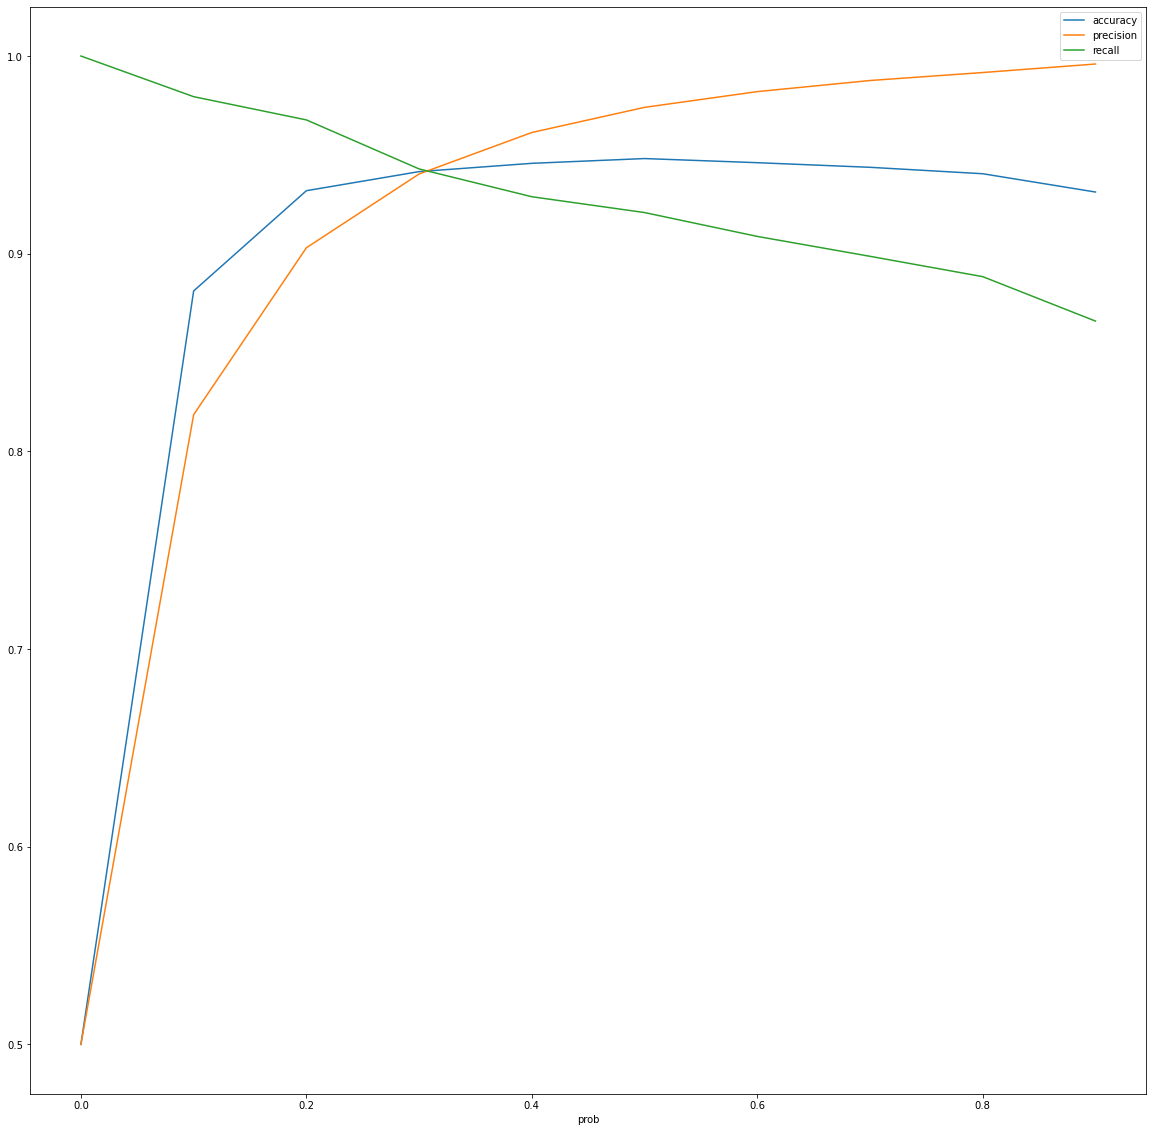

Cuttoff threshold is: 0.4949363527709807


In [114]:
# Let's plot accuracy precision and recall for various probabilities.

plt.figure(figsize=[1,1])
cutoff_df.plot.line(x='prob', y=['accuracy','precision','recall'])
plt.show()

threshold = thresholds[np.argmax(tpr-fpr)]
print('Cuttoff threshold is:',threshold)

We will take threshold as 0.50

In [115]:
y_train_pred_final_lr['final_predicted'] = y_train_pred_final_lr.Conversion_Prob.map( lambda x: 1 if x > 0.50 else 0)

y_train_pred_final_lr.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,1.000000,1,1,1,1,1,1,1,1,1,1,1
1,0,0.067123,1,0,0,0,0,0,0,0,0,0,0
2,0,0.025833,1,0,0,0,0,0,0,0,0,0,0
3,1,1.000000,1,1,1,1,1,1,1,1,1,1,1
4,1,1.000000,1,1,1,1,1,1,1,1,1,1,1


### Applying the Logistic Regression on Test Data with same Threshold which we got on Train Data


In [116]:
# Predicting y-test

y_test_pred_lr=pd.DataFrame(lr_best.predict_proba(X_ros_test))[1]
y_test_pred_lr

0         0.162438
1         0.084671
2         1.000000
3         0.002516
4         0.011694
            ...   
170584    0.031301
170585    0.022642
170586    0.813605
170587    0.078471
170588    0.010088
Name: 1, Length: 170589, dtype: float64

In [117]:
y_test_pred_final_lr= pd.DataFrame({'Converted': y_ros_test.values,'Conversion_Prob':y_test_pred_lr.values})
y_test_pred_final_lr

,Converted,Conversion_Prob
0,0,0.162438
1,0,0.084671
2,1,1.000000
3,0,0.002516
4,0,0.011694
...,...,...
170584,0,0.031301
170585,0,0.022642
170586,1,0.813605
170587,0,0.078471


In [118]:
y_test_pred_final_lr['final_predicted'] = y_test_pred_final_lr.Conversion_Prob.map( lambda x: 1 if x > 0.50 else 0)

y_test_pred_final_lr.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.162438,0
1,0,0.084671,0
2,1,1.000000,1
3,0,0.002516,0
4,0,0.011694,0


In [119]:
def evaluate_model(dt_classifier,confusion_metric_train,confusion_metric_test):
    print("Train Accuracy :", accuracy_score(y_train_pred_final_lr.Converted, y_train_pred_final_lr.final_predicted))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_pred_final_lr.Converted, y_train_pred_final_lr.final_predicted))
    print("Recall :", confusion_metric_train[1,1]/(confusion_metric_train[1,0]+confusion_metric_train[1,1]))
    print("Precision :", confusion_metric_train[1,1]/(confusion_metric_train[0,1]+confusion_metric_train[1,1]))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test_pred_final_lr.Converted, y_test_pred_final_lr.final_predicted))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test_pred_final_lr.Converted, y_test_pred_final_lr.final_predicted))
    print("Recall :", confusion_metric_test[1,1]/(confusion_metric_test[1,0]+confusion_metric_test[1,1]))
    print("Precision :", confusion_metric_test[1,1]/(confusion_metric_test[0,1]+confusion_metric_test[1,1]))

In [120]:
# Lets build confusion matrix on train and test

confusion_train_lr=confusion_matrix(y_train_pred_final_lr.Converted, y_train_pred_final_lr.final_predicted)

confusion_test_lr=confusion_matrix(y_test_pred_final_lr.Converted, y_test_pred_final_lr.final_predicted)


In [121]:
# Print the evaluation result by choosing a evaluation metric

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

evaluate_model(lr_best,confusion_train_lr,confusion_test_lr)

Train Accuracy : 0.9481259468245733
Train Confusion Matrix:
[[194133   4887]
 [ 15761 183260]]
Recall : 0.9208073519879811
Precision : 0.9740256288965543
--------------------------------------------------
Test Accuracy : 0.9490412629184766
Test Confusion Matrix:
[[83226  2069]
 [ 6624 78670]]
Recall : 0.9223392032264872
Precision : 0.9743742181597493


## SMOTE Data

In [122]:
# Repeating the same procedure of cross-validation and hyperparameter tunning on SMOTE data.

from sklearn.model_selection import GridSearchCV


params_lr={'C':num_C}  
grid_search_bal_lr=GridSearchCV(estimator=lr,param_grid=params_lr,cv=ss_bal,n_jobs=-1,verbose=1,scoring='roc_auc')
grid_search_bal_lr.fit(X_smote_train,y_smote_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(n_jobs=-1, random_state=100),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc', verbose=1)

In [123]:
# Getting the best model and best score out

lr_best= grid_search_bal_lr.best_estimator_
print(lr_best)

print(grid_search_bal_lr.best_score_)

LogisticRegression(C=0.1, n_jobs=-1, random_state=100)
0.9915111450202347


In [124]:
print('So the best ROC_AUC score we are getting is:',grid_search_bal_lr.best_score_,'using the given paramter',grid_search_bal_lr.best_params_)


So the best ROC_AUC score we are getting is: 0.9915111450202347 using the given paramter {'C': 0.1}


#### We have got ROC_AUC score = 99.1% so it is a good model to go but we'll find the threshold to get optimum precision and recall


In [125]:
y_train_pred_lr=pd.DataFrame(lr_best.predict_proba(X_smote_train))[1]
y_train_pred_lr

0         1.000000
1         0.051129
2         0.014202
3         0.854728
4         1.000000
            ...   
398036    1.000000
398037    1.000000
398038    0.999753
398039    0.005642
398040    0.000949
Name: 1, Length: 398041, dtype: float64

In [126]:
y_train_pred_final_lr= pd.DataFrame({'Converted': y_smote_train.values,'Conversion_Prob':y_train_pred_lr.values})
y_train_pred_final_lr

,Converted,Conversion_Prob
0,1,1.000000
1,0,0.051129
2,0,0.014202
3,1,0.854728
4,1,1.000000
...,...,...
398036,1,1.000000
398037,1,1.000000
398038,1,0.999753
398039,0,0.005642


In [127]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final_lr.Converted, y_train_pred_final_lr.Conversion_Prob, drop_intermediate = False )


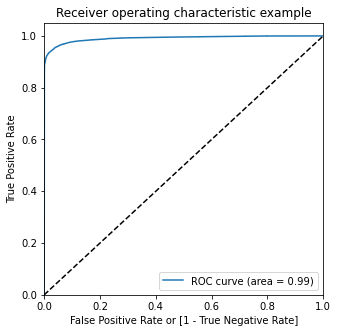

In [128]:
draw_roc(y_train_pred_final_lr.Converted, y_train_pred_final_lr.Conversion_Prob)


So 'Area under the curve' is also 99%. 


In [129]:
# Let's create a column with different probability cutt off

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_lr[i]= y_train_pred_final_lr.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_lr.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,1.000000,1,1,1,1,1,1,1,1,1,1
1,0,0.051129,1,0,0,0,0,0,0,0,0,0
2,0,0.014202,1,0,0,0,0,0,0,0,0,0
3,1,0.854728,1,1,1,1,1,1,1,1,1,0
4,1,1.000000,1,1,1,1,1,1,1,1,1,1


In [130]:
# Now let's calculate accuracy, precision and recall for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_lr.Converted, y_train_pred_final_lr[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,precision,recall]
print(cutoff_df)

     prob  accuracy  precision    recall
0.0   0.0  0.500001   0.500001  1.000000
0.1   0.1  0.916401   0.867422  0.983052
0.2   0.2  0.948540   0.930146  0.969923
0.3   0.3  0.957205   0.957578  0.956799
0.4   0.4  0.958434   0.972281  0.943775
0.5   0.5  0.959115   0.981275  0.936092
0.6   0.6  0.957886   0.987222  0.927781
0.7   0.7  0.955987   0.991247  0.920099
0.8   0.8  0.953774   0.993600  0.913431
0.9   0.9  0.948978   0.995943  0.901628


<Figure size 72x72 with 0 Axes>

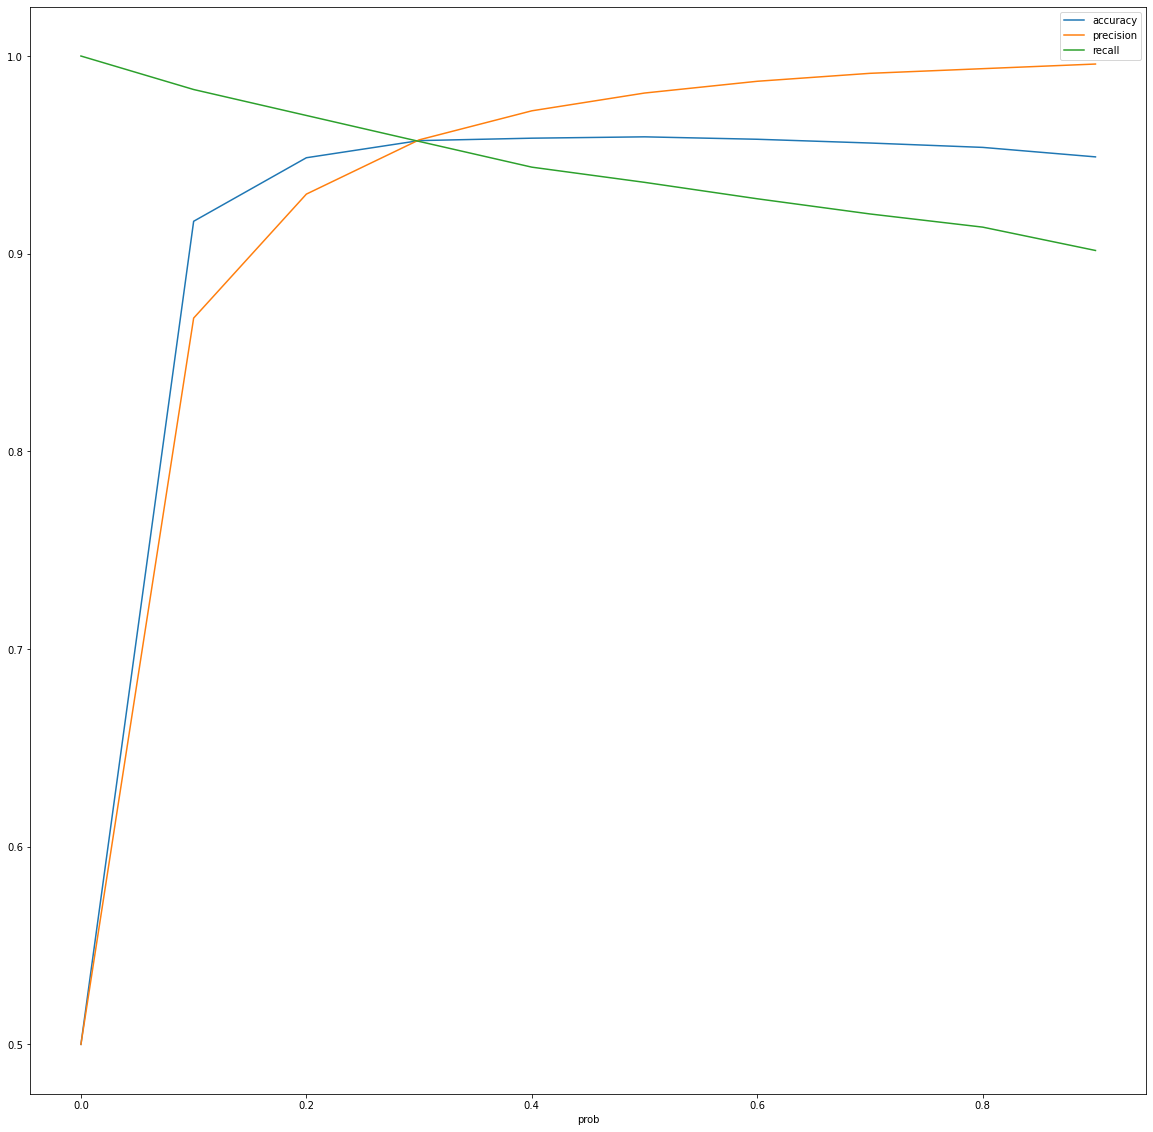

Cuttoff threshold is: 0.5162384981421541


In [131]:
# Let's plot accuracy precision and recall for various probabilities.

plt.figure(figsize=[1,1])
cutoff_df.plot.line(x='prob', y=['accuracy','precision','recall'])
plt.show()

threshold = thresholds[np.argmax(tpr-fpr)]
print('Cuttoff threshold is:',threshold)

We'll take threshold as 0.49 as precision and recall are similar at that probability

In [132]:
y_train_pred_final_lr['final_predicted'] = y_train_pred_final_lr.Conversion_Prob.map( lambda x: 1 if x > 0.49 else 0)

y_train_pred_final_lr.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,1.000000,1,1,1,1,1,1,1,1,1,1,1
1,0,0.051129,1,0,0,0,0,0,0,0,0,0,0
2,0,0.014202,1,0,0,0,0,0,0,0,0,0,0
3,1,0.854728,1,1,1,1,1,1,1,1,1,0,1
4,1,1.000000,1,1,1,1,1,1,1,1,1,1,1


### Applying the Logistic Regression on Test Data with same Threshold which we got on Train Data


In [133]:
# Predicting y-test

y_test_pred_lr=pd.DataFrame(lr_best.predict_proba(X_smote_test))[1]
y_test_pred_lr

0         0.188575
1         0.054785
2         1.000000
3         0.001371
4         0.007646
            ...   
170584    0.026195
170585    0.056870
170586    1.000000
170587    0.049525
170588    0.005617
Name: 1, Length: 170589, dtype: float64

In [134]:
y_test_pred_final_lr= pd.DataFrame({'Converted': y_smote_test.values,'Conversion_Prob':y_test_pred_lr.values})
y_test_pred_final_lr

,Converted,Conversion_Prob
0,0,0.188575
1,0,0.054785
2,1,1.000000
3,0,0.001371
4,0,0.007646
...,...,...
170584,0,0.026195
170585,0,0.056870
170586,1,1.000000
170587,0,0.049525


In [135]:
y_test_pred_final_lr['final_predicted'] = y_test_pred_final_lr.Conversion_Prob.map( lambda x: 1 if x > 0.49 else 0)

y_test_pred_final_lr.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.188575,0
1,0,0.054785,0
2,1,1.000000,1
3,0,0.001371,0
4,0,0.007646,0


In [136]:
def evaluate_model(dt_classifier,confusion_metric_train,confusion_metric_test):
    print("Train Accuracy :", accuracy_score(y_train_pred_final_lr.Converted, y_train_pred_final_lr.final_predicted))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_pred_final_lr.Converted, y_train_pred_final_lr.final_predicted))
    print("Recall :", confusion_metric_train[1,1]/(confusion_metric_train[1,0]+confusion_metric_train[1,1]))
    print("Precision :", confusion_metric_train[1,1]/(confusion_metric_train[0,1]+confusion_metric_train[1,1]))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test_pred_final_lr.Converted, y_test_pred_final_lr.final_predicted))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test_pred_final_lr.Converted, y_test_pred_final_lr.final_predicted))
    print("Recall :", confusion_metric_test[1,1]/(confusion_metric_test[1,0]+confusion_metric_test[1,1]))
    print("Precision :", confusion_metric_test[1,1]/(confusion_metric_test[0,1]+confusion_metric_test[1,1]))

In [137]:
# Lets build confusion matrix on train and test

confusion_train_lr=confusion_matrix(y_train_pred_final_lr.Converted, y_train_pred_final_lr.final_predicted)

confusion_test_lr=confusion_matrix(y_test_pred_final_lr.Converted, y_test_pred_final_lr.final_predicted)




In [138]:
# Print the evaluation result by choosing a evaluation metric

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

evaluate_model(lr_best,confusion_train_lr,confusion_test_lr)

Train Accuracy : 0.9589891493589856
Train Confusion Matrix:
[[195286   3734]
 [ 12590 186431]]
Recall : 0.9367403439838007
Precision : 0.9803644203717824
--------------------------------------------------
Test Accuracy : 0.959276389450668
Test Confusion Matrix:
[[83664  1631]
 [ 5316 79978]]
Recall : 0.9376743967922715
Precision : 0.9800144591895502


Hence, with smote-balanced data we are able to get good recall with 1% compromise in precision

## ADASYN Data

In [139]:
# Repeating the same procedure of cross-validation and hyperparameter tunning on ADASYN data.

from sklearn.model_selection import GridSearchCV


params_lr={'C':num_C}  
grid_search_bal_lr=GridSearchCV(estimator=lr,param_grid=params_lr,cv=ss_bal,n_jobs=-1,verbose=1,scoring='roc_auc')
grid_search_bal_lr.fit(X_ada_train,y_ada_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(n_jobs=-1, random_state=100),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc', verbose=1)

In [140]:
# Getting the best model and best score out

lr_best= grid_search_bal_lr.best_estimator_
print(lr_best)

print(grid_search_bal_lr.best_score_)

LogisticRegression(C=1000, n_jobs=-1, random_state=100)
0.9773120365299598


In [141]:
print('So the best ROC_AUC score we are getting is:',grid_search_bal_lr.best_score_,'using the given paramter',grid_search_bal_lr.best_params_)


So the best ROC_AUC score we are getting is: 0.9773120365299598 using the given paramter {'C': 1000}


#### We have got ROC_AUC score = 97.7% so it is a good model to go but we'll find the threshold to get optimum precision and recall


In [142]:
y_train_pred_lr=pd.DataFrame(lr_best.predict_proba(X_ada_train))[1]
y_train_pred_lr

0         0.051593
1         0.034307
2         0.120770
3         1.000000
4         0.009227
            ...   
397983    0.174346
397984    0.411503
397985    0.006667
397986    0.010689
397987    0.967191
Name: 1, Length: 397988, dtype: float64

In [143]:
y_train_pred_final_lr= pd.DataFrame({'Converted': y_ada_train.values,'Conversion_Prob':y_train_pred_lr.values})
y_train_pred_final_lr

,Converted,Conversion_Prob
0,0,0.051593
1,0,0.034307
2,0,0.120770
3,1,1.000000
4,0,0.009227
...,...,...
397983,0,0.174346
397984,0,0.411503
397985,0,0.006667
397986,0,0.010689


In [144]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final_lr.Converted, y_train_pred_final_lr.Conversion_Prob, drop_intermediate = False )


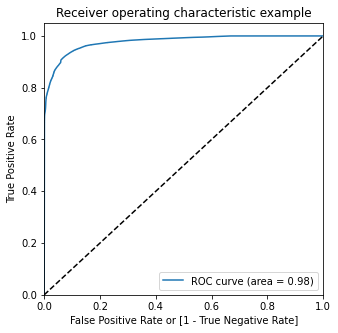

In [145]:
draw_roc(y_train_pred_final_lr.Converted, y_train_pred_final_lr.Conversion_Prob)


So 'Area under the curve' is also 98%. 


In [146]:
# Let's create a column with different probability cutt off

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_lr[i]= y_train_pred_final_lr.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_lr.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.051593,1,0,0,0,0,0,0,0,0,0
1,0,0.034307,1,0,0,0,0,0,0,0,0,0
2,0,0.120770,1,1,0,0,0,0,0,0,0,0
3,1,1.000000,1,1,1,1,1,1,1,1,1,1
4,0,0.009227,1,0,0,0,0,0,0,0,0,0


In [147]:
# Now let's calculate accuracy precision and recall for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_lr.Converted, y_train_pred_final_lr[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,precision,recall]
print(cutoff_df)

     prob  accuracy  precision    recall
0.0   0.0  0.499935   0.499935  1.000000
0.1   0.1  0.828990   0.750999  0.984284
0.2   0.2  0.901286   0.856146  0.964627
0.3   0.3  0.918490   0.897722  0.944574
0.4   0.4  0.923613   0.925118  0.921822
0.5   0.5  0.917935   0.944797  0.887716
0.6   0.6  0.913256   0.960251  0.862179
0.7   0.7  0.902419   0.971287  0.829329
0.8   0.8  0.892610   0.979462  0.802008
0.9   0.9  0.881419   0.988233  0.771999


<Figure size 72x72 with 0 Axes>

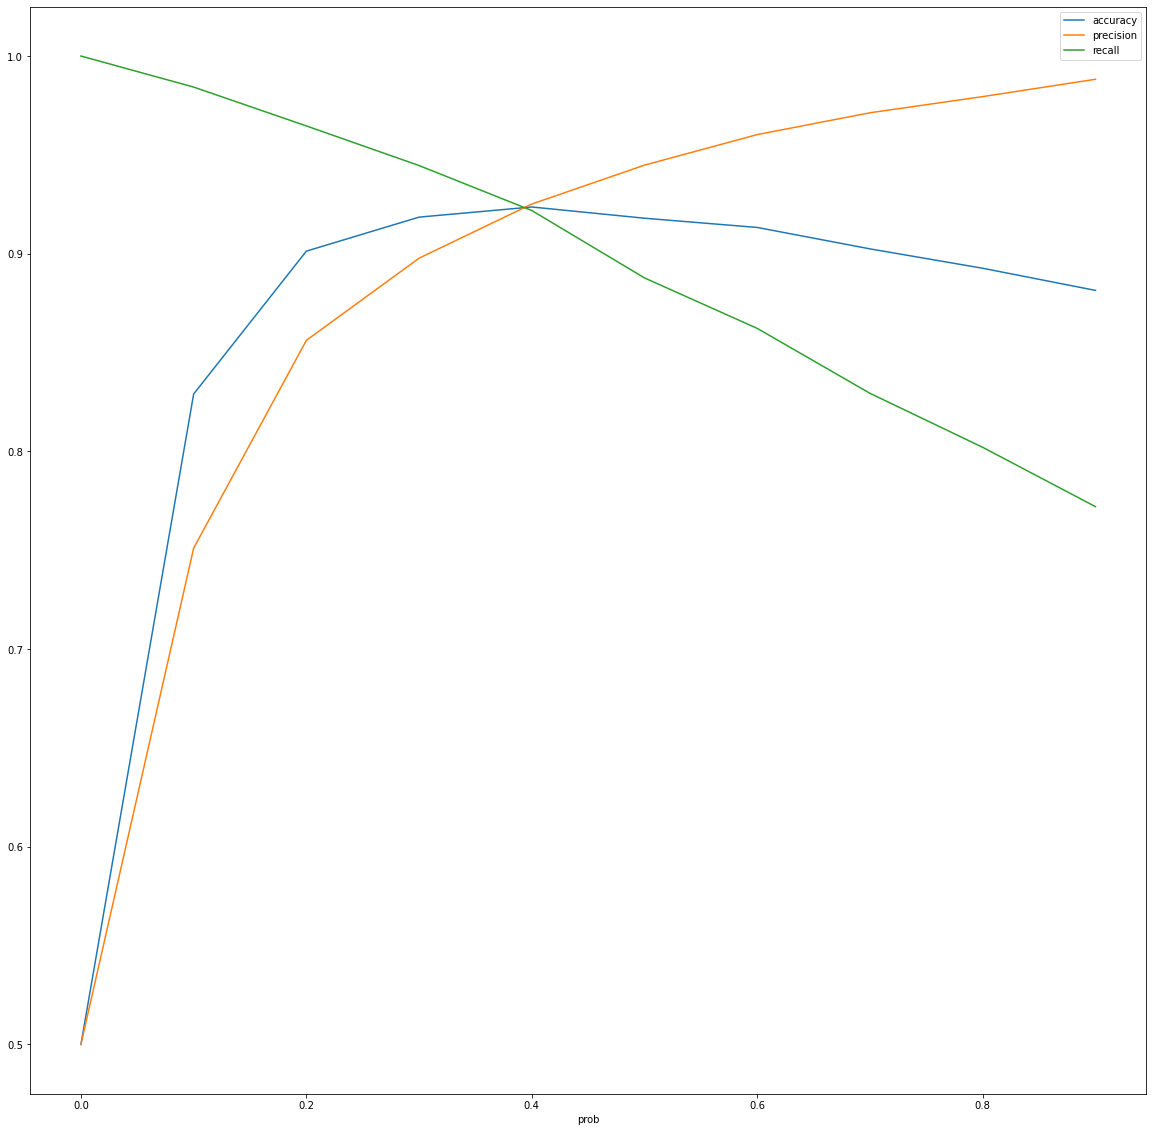

Cuttoff threshold is: 0.4250919140868949


In [148]:
# Let's plot accuracy precision and recall for various probabilities.

plt.figure(figsize=[1,1])
cutoff_df.plot.line(x='prob', y=['accuracy','precision','recall'])
plt.show()

threshold = thresholds[np.argmax(tpr-fpr)]
print('Cuttoff threshold is:',threshold)

We'll take threshold as 0.43 as we are getting similar values of precision and recall at that point


In [149]:
y_train_pred_final_lr['final_predicted'] = y_train_pred_final_lr.Conversion_Prob.map( lambda x: 1 if x > 0.43 else 0)

y_train_pred_final_lr.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.051593,1,0,0,0,0,0,0,0,0,0,0
1,0,0.034307,1,0,0,0,0,0,0,0,0,0,0
2,0,0.120770,1,1,0,0,0,0,0,0,0,0,0
3,1,1.000000,1,1,1,1,1,1,1,1,1,1,1
4,0,0.009227,1,0,0,0,0,0,0,0,0,0,0


### Applying the Logistic Regression on Test Data with same Threshold which we got on Train Data


In [150]:
# Predicting y-test

y_test_pred_lr=pd.DataFrame(lr_best.predict_proba(X_ada_test))[1]
y_test_pred_lr

0         1.000000
1         0.039741
2         0.097105
3         1.000000
4         0.446635
            ...   
170562    0.144085
170563    1.000000
170564    0.559741
170565    0.539031
170566    1.000000
Name: 1, Length: 170567, dtype: float64

In [151]:
y_test_pred_final_lr= pd.DataFrame({'Converted': y_ada_test.values,'Conversion_Prob':y_test_pred_lr.values})
y_test_pred_final_lr

,Converted,Conversion_Prob
0,1,1.000000
1,0,0.039741
2,0,0.097105
3,1,1.000000
4,0,0.446635
...,...,...
170562,0,0.144085
170563,1,1.000000
170564,1,0.559741
170565,0,0.539031


In [152]:
y_test_pred_final_lr['final_predicted'] = y_test_pred_final_lr.Conversion_Prob.map( lambda x: 1 if x > 0.43 else 0)

y_test_pred_final_lr.head()

,Converted,Conversion_Prob,final_predicted
0,1,1.000000,1
1,0,0.039741,0
2,0,0.097105,0
3,1,1.000000,1
4,0,0.446635,1


In [153]:
def evaluate_model(dt_classifier,confusion_metric_train,confusion_metric_test):
    print("Train Accuracy :", accuracy_score(y_train_pred_final_lr.Converted, y_train_pred_final_lr.final_predicted))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_pred_final_lr.Converted, y_train_pred_final_lr.final_predicted))
    print("Recall :", confusion_metric_train[1,1]/(confusion_metric_train[1,0]+confusion_metric_train[1,1]))
    print("Precision :", confusion_metric_train[1,1]/(confusion_metric_train[0,1]+confusion_metric_train[1,1]))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test_pred_final_lr.Converted, y_test_pred_final_lr.final_predicted))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test_pred_final_lr.Converted, y_test_pred_final_lr.final_predicted))
    print("Recall :", confusion_metric_test[1,1]/(confusion_metric_test[1,0]+confusion_metric_test[1,1]))
    print("Precision :", confusion_metric_test[1,1]/(confusion_metric_test[0,1]+confusion_metric_test[1,1]))

In [154]:
# Lets build confusion matrix on train and test

confusion_train_lr=confusion_matrix(y_train_pred_final_lr.Converted, y_train_pred_final_lr.final_predicted)

confusion_test_lr=confusion_matrix(y_test_pred_final_lr.Converted, y_test_pred_final_lr.final_predicted)

In [155]:
# Print the evaluation result by choosing a evaluation metric

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

evaluate_model(lr_best,confusion_train_lr,confusion_test_lr)


Train Accuracy : 0.9238318743278692
Train Confusion Matrix:
[[185810  13210]
 [ 17104 181864]]
Recall : 0.9140364279683165
Precision : 0.9322821083281216
--------------------------------------------------
Test Accuracy : 0.9245223284691646
Test Confusion Matrix:
[[79738  5557]
 [ 7317 77955]]
Recall : 0.9141922319166901
Precision : 0.9334586646230482


### By trying different balanced datasets on different models, we can conclude that best data balancing technique for Linear regression model is SMOTE.


-------------------------------------------------------------------------------------------------------------------------------

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# Decision Tree On Different Datasets

## Random Over Sampled Data

In [156]:
# Now we will be running the Decision Tree model using Cross-Validation and Hyperparamter tunning to see it performance on Random Over Sampled Dataset.

dt=DecisionTreeClassifier()

params={
    'max_depth': range(1, 5, 2),
    'min_samples_leaf': range(25, 125, 25),
    'min_samples_split': range(75, 125, 15)
}

grid_search_bal=GridSearchCV(estimator=dt,param_grid=params,cv=ss_bal,n_jobs=16,verbose=1,scoring='roc_auc')


grid_search_bal.fit(X_ros_train,y_ros_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=16,
             param_grid={'max_depth': range(1, 5, 2),
                         'min_samples_leaf': range(25, 125, 25),
                         'min_samples_split': range(75, 125, 15)},
             scoring='roc_auc', verbose=1)

In [157]:
# printing the optimal ROC_AUC score score and hyperparameters

print('We can get ROC_AUC score of',grid_search_bal.best_score_,'using :',grid_search_bal.best_params_)

We can get ROC_AUC score of 0.9686204980402978 using : {'max_depth': 3, 'min_samples_leaf': 75, 'min_samples_split': 75}


So, on Random Oversampled Data we are getting ROC-AUC score of 96.8%

## SMOTE Data

In [158]:
# Now we'll repeat the same procedure on SMOTE transformed dataset  

dt=DecisionTreeClassifier()

params={
    'max_depth': range(1, 5, 2),
    'min_samples_leaf': range(25, 125, 25),
    'min_samples_split': range(75, 125, 15)
}

grid_search_bal=GridSearchCV(estimator=dt,param_grid=params,cv=ss_bal,n_jobs=16,verbose=1,scoring='roc_auc')


grid_search_bal.fit(X_smote_train,y_smote_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=16,
             param_grid={'max_depth': range(1, 5, 2),
                         'min_samples_leaf': range(25, 125, 25),
                         'min_samples_split': range(75, 125, 15)},
             scoring='roc_auc', verbose=1)

In [159]:
# printing the optimal ROC_AUC score score and hyperparameters

print('We can get ROC_AUC score of',grid_search_bal.best_score_,'using :',grid_search_bal.best_params_)

We can get ROC_AUC score of 0.9746935107685447 using : {'max_depth': 3, 'min_samples_leaf': 25, 'min_samples_split': 75}


So, on SMOTE Data we are getting ROC-AUC score of 97.53%

## ADASYN Data

In [160]:
# Now we'll repeat the same procedure on SMOTE transformed dataset  

dt=DecisionTreeClassifier()

params={
    'max_depth': range(1, 5, 2),
    'min_samples_leaf': range(25, 125, 25),
    'min_samples_split': range(75, 125, 15)
}

grid_search_bal=GridSearchCV(estimator=dt,param_grid=params,cv=ss_bal,n_jobs=16,verbose=1,scoring='roc_auc')


grid_search_bal.fit(X_ada_train,y_ada_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=16,
             param_grid={'max_depth': range(1, 5, 2),
                         'min_samples_leaf': range(25, 125, 25),
                         'min_samples_split': range(75, 125, 15)},
             scoring='roc_auc', verbose=1)

In [161]:
# printing the optimal ROC_AUC score score and hyperparameters

print('We can get ROC_AUC score of',grid_search.best_score_,'using :',grid_search.best_params_)

We can get ROC_AUC score of 0.9183646524948994 using : {'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 75}


So, on ADASYN Data we are getting ROC-AUC score of 91.83%

#### So, for Decision Tree as well the best model we get is on SMOTE-transformed data set

# Random Forest on Different Datasets

## Random Over Sampled Data

In [162]:
# Checking the performance of Random Forest on Random Over Sampled Data
# Importing the package

from sklearn.ensemble import RandomForestClassifier


# Instantiating a random forest model

rf= RandomForestClassifier(random_state=100,oob_score=True)

# Defining the range of hyperparamters for tuning and doing cross-validation with those on X_train and y_train

params_rf={
    'max_depth': range(1, 5, 2),
    'min_samples_leaf': range(25, 125, 25),
    'min_samples_split': range(75, 125, 15),
    'n_estimators': [10,15,20], 
    'max_features': [5, 10]
}

grid_search_rf_bal=GridSearchCV(estimator=rf,param_grid=params_rf,cv=ss_bal,n_jobs=16,verbose=1,scoring='roc_auc')


grid_search_rf_bal.fit(X_ros_train,y_ros_train)

Fitting 4 folds for each of 192 candidates, totalling 768 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(oob_score=True, random_state=100),
             n_jobs=16,
             param_grid={'max_depth': range(1, 5, 2), 'max_features': [5, 10],
                         'min_samples_leaf': range(25, 125, 25),
                         'min_samples_split': range(75, 125, 15),
                         'n_estimators': [10, 15, 20]},
             scoring='roc_auc', verbose=1)

In [163]:
# printing the optimal ROC_AUC score score and hyperparameters

print('We can get ROC_AUC score of',grid_search_rf_bal.best_score_.round(3)*100,'% using :',grid_search_rf_bal.best_params_)

We can get ROC_AUC score of 98.2 % using : {'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 25, 'min_samples_split': 75, 'n_estimators': 15}


On Random Oversampled data we get the accuracy of 98.1%

## SMOTE Data

In [164]:
# Now we'll repeat the same procedure on SMOTE transformed dataset
# Importing the package

from sklearn.ensemble import RandomForestClassifier


# Instantiating a random forest model

rf= RandomForestClassifier(random_state=100,n_jobs=16,oob_score=True)

# Defining the range of hyperparamters for tuning and doing cross-validation with those on X_train and y_train

params_rf={
    'max_depth': range(1, 5, 2),
    'min_samples_leaf': range(25, 125, 25),
    'min_samples_split': range(75, 125, 15),
    'n_estimators': [10,15,20], 
    'max_features': [5, 10]
}

grid_search_rf_bal=GridSearchCV(estimator=rf,param_grid=params_rf,cv=ss_bal,n_jobs=-1,verbose=1,scoring='roc_auc')


grid_search_rf_bal.fit(X_smote_train,y_smote_train)

Fitting 4 folds for each of 192 candidates, totalling 768 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=16, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 5, 2), 'max_features': [5, 10],
                         'min_samples_leaf': range(25, 125, 25),
                         'min_samples_split': range(75, 125, 15),
                         'n_estimators': [10, 15, 20]},
             scoring='roc_auc', verbose=1)

In [165]:
# printing the optimal ROC_AUC score and hyperparameters

print('We can get ROC_AUC score of',grid_search_rf_bal.best_score_.round(3)*100,'% using :',grid_search_rf_bal.best_params_)



We can get ROC_AUC score of 98.7 % using : {'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 25, 'min_samples_split': 75, 'n_estimators': 15}


On SMOTE data we are getting the accuracy of 98.7%

## ADASYN Data

In [166]:
# Now we'll repeat the same procedure on ADASYN transformed dataset
# Importing the package

from sklearn.ensemble import RandomForestClassifier


# Instantiating a random forest model

rf= RandomForestClassifier(random_state=100,n_jobs=16,oob_score=True)

# Defining the range of hyperparamters for tuning and doing cross-validation with those on X_train and y_train

params_rf={
    'max_depth': range(1, 5, 2),
    'min_samples_leaf': range(25, 125, 25),
    'min_samples_split': range(75, 125, 15),
    'n_estimators': [10,15,20], 
    'max_features': [5, 10]
}

grid_search_rf_bal=GridSearchCV(estimator=rf,param_grid=params_rf,cv=ss_bal,n_jobs=-1,verbose=1,scoring='roc_auc')


grid_search_rf_bal.fit(X_ada_train,y_ada_train)

Fitting 4 folds for each of 192 candidates, totalling 768 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=16, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 5, 2), 'max_features': [5, 10],
                         'min_samples_leaf': range(25, 125, 25),
                         'min_samples_split': range(75, 125, 15),
                         'n_estimators': [10, 15, 20]},
             scoring='roc_auc', verbose=1)

In [167]:
# printing the optimal ROC_AUC score and hyperparameters

print('We can get ROC_AUC score of',grid_search_rf_bal.best_score_.round(3)*100,'% using :',grid_search_rf_bal.best_params_)

We can get ROC_AUC score of 97.1 % using : {'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 75, 'n_estimators': 20}


Randomforest model in ADASYN balanced data doesn't gives better result than SMOTE. 

#### Hence we can conclude that RF model gives the best results on SMOTE balanced dataset.

# XGBoost on Different Datasets

## Random Oversampled Data

In [168]:
# Checking the performance of XGBoost model on Randomoversampled data
# Instantiating the model 

xgb=XGBClassifier(random_state=100)

# Defining all the hyperparameters for tuning

params_xgb={
    'max_depth': [1,10],
    'learning_rate': [1],
    'reg_lambda':[0,3,6],
    'subsample':[0.3,0.6,0.9]
}

grid_search_xgb_bal=GridSearchCV(estimator=xgb,param_grid=params_xgb,cv=ss_bal,n_jobs=16,verbose=1,scoring='roc_auc')
grid_search_xgb_bal.fit(X_ros_train,y_ros_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
[18:03:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, reg_alpha=None,
                            

In [169]:


print('We can get ROC_AUC score of',(grid_search_xgb_bal.best_score_*100).round(2),'% using :',grid_search_xgb_bal.best_params_)

We can get ROC_AUC score of 100.0 % using : {'learning_rate': 1, 'max_depth': 10, 'reg_lambda': 6, 'subsample': 0.6}


## SMOTE Data

In [170]:
# Repeating the same procedure as above for SMOTE data
# Instantiating the model

xgb=XGBClassifier(random_state=100)

# Defining all the hyperparameters for tuning

params_xgb={
    'max_depth': [1,10],
    'learning_rate': [1],
    'reg_lambda':[0,3,6],
    'subsample':[0.3,0.6,0.9]
}

grid_search_xgb_bal=GridSearchCV(estimator=xgb,param_grid=params_xgb,cv=ss_bal,n_jobs=16,verbose=1,scoring='roc_auc')
grid_search_xgb_bal.fit(X_smote_train,y_smote_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
[18:40:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, reg_alpha=None,
                            

In [171]:
print('We can get ROC_AUC score of',(grid_search_xgb_bal.best_score_*100).round(2),'% using :',grid_search_xgb_bal.best_params_)

We can get ROC_AUC score of 100.0 % using : {'learning_rate': 1, 'max_depth': 10, 'reg_lambda': 3, 'subsample': 0.9}


## ADASYN Data

In [172]:
# Instantiating the model for the final time

xgb=XGBClassifier(random_state=100)

# Defining all the hyperparameters for tuning

params_xgb={
    'max_depth': [1,10],
    'learning_rate': [1],
    'reg_lambda':[0,3,6],
    'subsample':[0.3,0.6,0.9]
}

grid_search_xgb_bal=GridSearchCV(estimator=xgb,param_grid=params_xgb,cv=ss_bal,n_jobs=16,verbose=1,scoring='roc_auc')
grid_search_xgb_bal.fit(X_ada_train,y_ada_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
[19:29:57] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, reg_alpha=None,
                            

In [173]:
print('We can get ROC_AUC score of',(grid_search_xgb_bal.best_score_*100).round(2),'% using :',grid_search_xgb_bal.best_params_)

We can get ROC_AUC score of 100.0 % using : {'learning_rate': 1, 'max_depth': 10, 'reg_lambda': 3, 'subsample': 0.9}


Hence the each balanced data-set is giving 100% ROC_AUC score for XG-Boost model.

#### We'll consider the SMOTE to be the best one as SMOTE was proved to get best result among all types of balanced data

## Hence, we can say that best combination of Models and Balancing techniques is : 

## XGBoost-SMOTE Transformed data

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [174]:
# perform the best oversampling method on X_train & y_train

clf =XGBClassifier(random_state=100,n_jobs=16,learning_rate=1,max_depth=10,reg_lambda=3,subsample=0.6)
 #initialise the model with optimum hyperparameters which we got on XGBoost algorithm
clf.fit(X_smote_train,y_smote_train) # fit on the balanced dataset which we got using SMOTE technique.


[19:31:01] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=3, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [175]:
# Predicting y-train

y_train_pred_xgb=pd.DataFrame(clf.predict_proba(X_smote_train))[1]
y_train_pred_xgb

0         1.000000e+00
1         5.029046e-08
2         4.902963e-08
3         9.997173e-01
4         1.000000e+00
              ...     
398036    1.000000e+00
398037    1.000000e+00
398038    9.999959e-01
398039    1.086143e-09
398040    1.752890e-07
Name: 1, Length: 398041, dtype: float32

In [176]:
y_train_pred_final_xgb= pd.DataFrame({'Converted': y_smote_train.values,'Conversion_Prob':y_train_pred_xgb.values})
y_train_pred_final_xgb

,Converted,Conversion_Prob
0,1,1.000000e+00
1,0,5.029046e-08
2,0,4.902963e-08
3,1,9.997173e-01
4,1,1.000000e+00
...,...,...
398036,1,1.000000e+00
398037,1,1.000000e+00
398038,1,9.999959e-01
398039,0,1.086143e-09


In [177]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final_xgb.Converted, y_train_pred_final_xgb.Conversion_Prob, drop_intermediate = False )


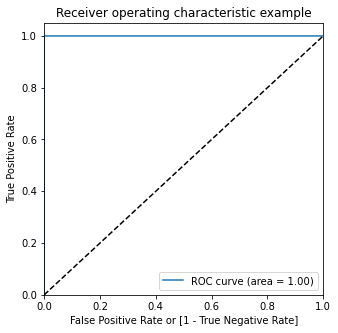

In [178]:
# Visualizing the ROC_Curve

draw_roc(y_train_pred_final_xgb.Converted, y_train_pred_final_xgb.Conversion_Prob)


In [179]:
# Let's now create a column with different probability cutt off to find the optimum threshold on given best model

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_xgb[i]= y_train_pred_final_xgb.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_xgb.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,1.000000e+00,1,1,1,1,1,1,1,1,1,1
1,0,5.029046e-08,1,0,0,0,0,0,0,0,0,0
2,0,4.902963e-08,1,0,0,0,0,0,0,0,0,0
3,1,9.997173e-01,1,1,1,1,1,1,1,1,1,1
4,1,1.000000e+00,1,1,1,1,1,1,1,1,1,1


In [180]:
# Now let's calculate accuracy precision and recall for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_xgb.Converted, y_train_pred_final_xgb[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    precision = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,precision,recall]
print(cutoff_df)

     prob  accuracy  precision  recall
0.0   0.0  0.500001   0.500001     1.0
0.1   0.1  0.999995   0.999990     1.0
0.2   0.2  1.000000   1.000000     1.0
0.3   0.3  1.000000   1.000000     1.0
0.4   0.4  1.000000   1.000000     1.0
0.5   0.5  1.000000   1.000000     1.0
0.6   0.6  1.000000   1.000000     1.0
0.7   0.7  1.000000   1.000000     1.0
0.8   0.8  1.000000   1.000000     1.0
0.9   0.9  1.000000   1.000000     1.0


<Figure size 360x360 with 0 Axes>

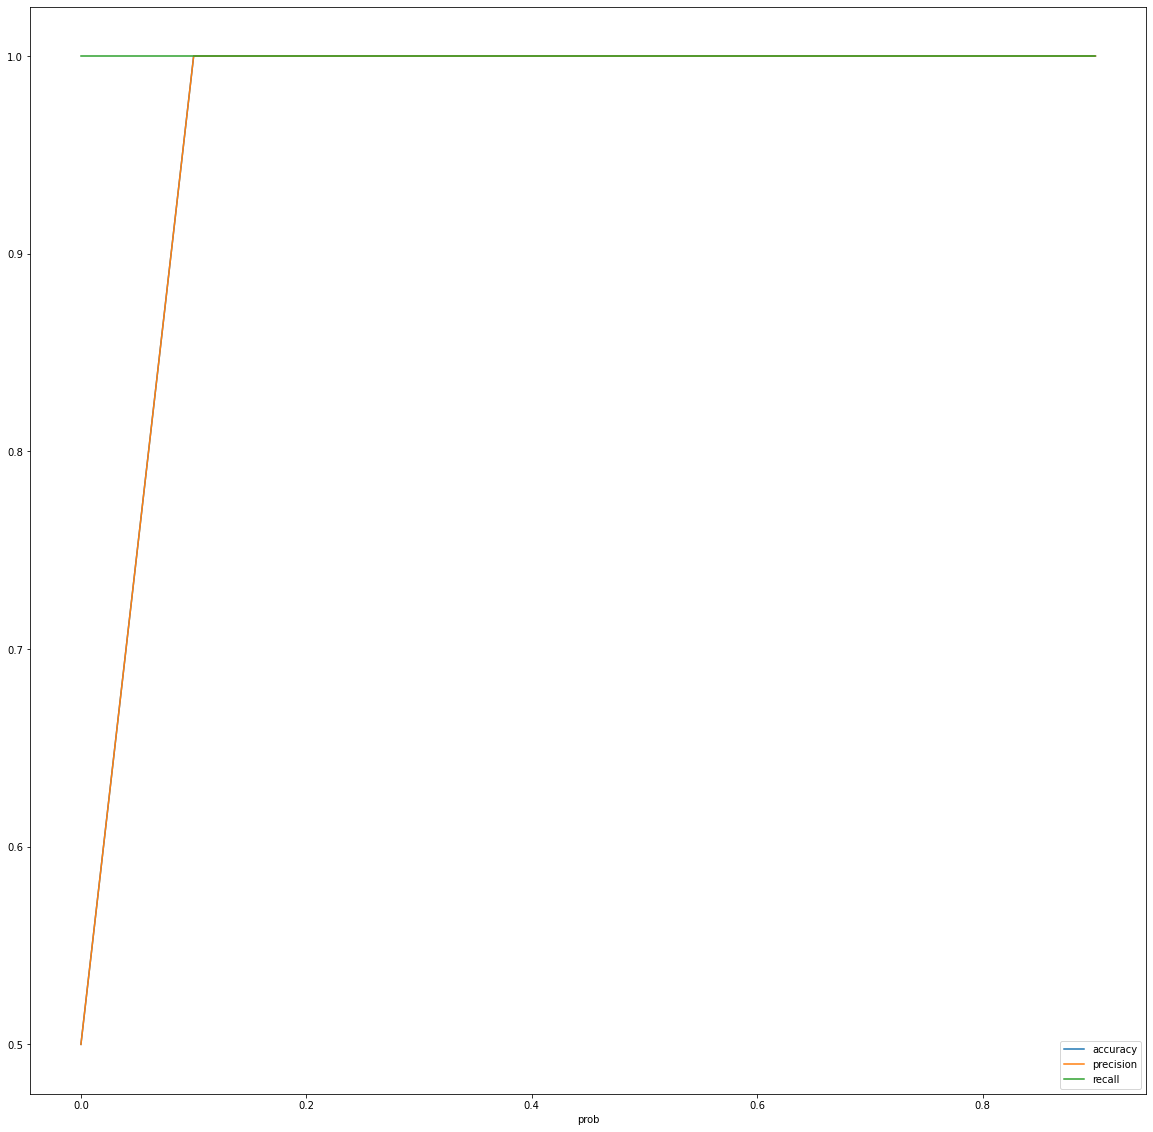

Cuttoff threshold is: 0.98059225


In [181]:
# Let's plot accuracy precision and recall for various probabilities.
plt.figure(figsize=[5,5])
cutoff_df.plot.line(x='prob', y=['accuracy','precision','recall'])
plt.show()

threshold = thresholds[np.argmax(tpr-fpr)]
print('Cuttoff threshold is:',threshold)

We can consider Threshold to be at 0.87.


In [182]:
y_train_pred_final_xgb['final_predicted'] = y_train_pred_final_xgb.Conversion_Prob.map( lambda x: 1 if x > 0.87 else 0)

y_train_pred_final_xgb.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,1.000000e+00,1,1,1,1,1,1,1,1,1,1,1
1,0,5.029046e-08,1,0,0,0,0,0,0,0,0,0,0
2,0,4.902963e-08,1,0,0,0,0,0,0,0,0,0,0
3,1,9.997173e-01,1,1,1,1,1,1,1,1,1,1,1
4,1,1.000000e+00,1,1,1,1,1,1,1,1,1,1,1


#### Predicting the model on test data


In [183]:
# Predicting y-test

y_test_pred_xgb=pd.DataFrame(clf.predict_proba(X_smote_test))[1]
y_test_pred_xgb


0         1.052558e-06
1         4.471194e-07
2         9.999967e-01
3         3.479859e-08
4         1.889205e-08
              ...     
170584    2.954322e-07
170585    3.635988e-07
170586    1.000000e+00
170587    3.419833e-06
170588    4.184602e-07
Name: 1, Length: 170589, dtype: float32

In [184]:
y_test_pred_final_xgb= pd.DataFrame({'Converted': y_smote_test.values,'Conversion_Prob':y_test_pred_xgb.values})
y_test_pred_final_xgb

,Converted,Conversion_Prob
0,0,1.052558e-06
1,0,4.471194e-07
2,1,9.999967e-01
3,0,3.479859e-08
4,0,1.889205e-08
...,...,...
170584,0,2.954322e-07
170585,0,3.635988e-07
170586,1,1.000000e+00
170587,0,3.419833e-06


In [185]:
y_test_pred_final_xgb['final_predicted'] = y_test_pred_final_xgb.Conversion_Prob.map( lambda x: 1 if x > 0.87 else 0)

y_test_pred_final_xgb.head()

,Converted,Conversion_Prob,final_predicted
0,0,1.052558e-06,0
1,0,4.471194e-07,0
2,1,9.999967e-01,1
3,0,3.479859e-08,0
4,0,1.889205e-08,0


In [186]:
# Evaluating the Model

def evaluate_model(dt_classifier,confusion_metric_train,confusion_metric_test):
    print("Train Accuracy :", accuracy_score(y_train_pred_final_xgb.Converted, y_train_pred_final_xgb.final_predicted))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_pred_final_xgb.Converted, y_train_pred_final_xgb.final_predicted))
    print("Recall :", confusion_metric_train[1,1]/(confusion_metric_train[1,0]+confusion_metric_train[1,1]))
    print("Precision :", confusion_metric_train[1,1]/(confusion_metric_train[0,1]+confusion_metric_train[1,1]))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test_pred_final_xgb.Converted, y_test_pred_final_xgb.final_predicted))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test_pred_final_xgb.Converted, y_test_pred_final_xgb.final_predicted))
    print("Recall :", confusion_metric_test[1,1]/(confusion_metric_test[1,0]+confusion_metric_test[1,1]))
    print("Precision :", confusion_metric_test[1,1]/(confusion_metric_test[0,1]+confusion_metric_test[1,1]))

In [187]:
# Lets build confusion matrix on train and test

confusion_train_xgb=confusion_matrix(y_train_pred_final_xgb.Converted, y_train_pred_final_xgb.final_predicted)

confusion_test_xgb=confusion_matrix(y_test_pred_final_xgb.Converted, y_test_pred_final_xgb.final_predicted)

In [188]:
# Evaluating the model performance with respect to each relavant metrics on train and test

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

evaluate_model(clf,confusion_train_xgb,confusion_test_xgb)

Train Accuracy : 1.0
Train Confusion Matrix:
[[199020      0]
 [     0 199021]]
Recall : 1.0
Precision : 1.0
--------------------------------------------------
Test Accuracy : 0.9998534489328151
Test Confusion Matrix:
[[85272    23]
 [    2 85292]]
Recall : 0.9999765516917954
Precision : 0.9997304108304519


The given model is showing ideal results on train but test is also showing reliable result with minimum difference between them.

### Hence, above given is the evaluation score of XGBoost model with respect to each evaluation metric on SMOTE balanced dataset. And based on test-scores we can conclude that model is reliable.












### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


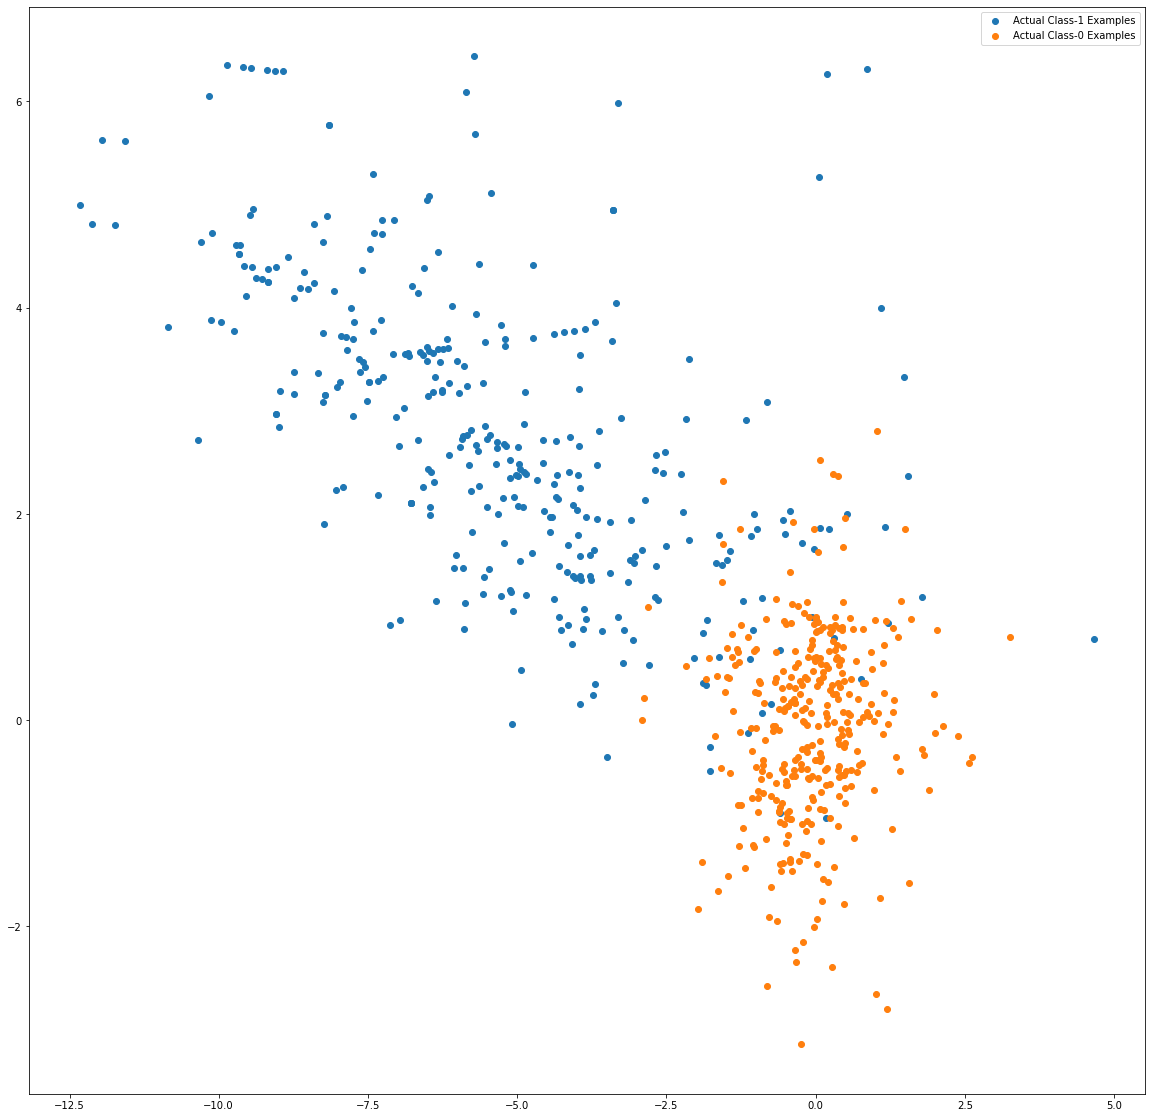

In [190]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

plt.show()

The top important variables are: '14', '4' and '12' as per the balanced dataset.

As it is PCA-transformed dataset so its not possible to interpret the best features but on other dataset we could.

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

To sum up, we made complete models of Logistic regression for each type of dataset in which we calculated ROC_AUC score as well as accuracy, precision and recall metrics. And we got good results for both the case i.e Balanced and Unbalanced.

Secondly, we tried different algorithms for getting better model than Logistic regression and we got XGBoost as the best-one(on the basis of ROC-AUC score) for both the datasets i.e Balanced and Imbalanced.

Moreover, we tried different data-balancing techniques like 'Random Oversampling', 'SMOTE', 'ADASYN' among which SMOTE gave the best results for each algorithm.

Lastly, Top-3 most contributing features (as per the XGboost algorithm) on the Unbalanced dataset is: 1)17, 2)14, 3)4. And on Balanced dataset it is: 1)14, 2)4, 3)12.